# Problem defintion

### Problem Statement

Over the last few years, the Client has captured several health, demographic and lifestyle details about its patients. This includes details such as age and gender, along with several health parameters (e.g. hypertension, body mass index) and lifestyle related variables (e.g. smoking status, occupation type).

The Client wants to **predict the probability of stroke** happening to their patients. This will help doctors take proactive health measures for these patients.

## Hypothesis Generation

* The probability of stroke can increase with  age, Blood Pressure, Previous Heart attacks, High cholesterol, Diabetes history etc
* certain diet can cause Obesity, 
* Smoking also can cause stroke 



## Step 1: Load essential Python Libraries

In [1]:
# Set Location path :

import os
os.chdir(r"D:\Datascience\Analytics vidya\LabAV\ML hackathon Assesment")

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # Plotting charts
import seaborn as sns # Plotting charts

from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer



# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")


## Step 2: Load Training/Test datasets in Python environment

In [2]:
data = pd.read_csv(r"train_ajEneEa_dnOZexc.csv") # Load training dataset
test = pd.read_csv(r"test_6A7bQyC_NGQrLdg.csv") # Load test dataset
sample = pd.read_csv(r"sample_submission_edb3Rsw_Cy6dBA7.csv") # Load final submission dataset

print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(data.shape, test.shape))


Train dataset shape: (43400, 12), 
Test dataset shape: (18601, 11)


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [3]:
train = data
dataorg = data.copy()
testorg = test.copy()


# Initial feel about the data

train.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [4]:
train.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43390,10096,Female,69.0,0,0,Yes,Self-employed,Urban,229.85,31.2,never smoked,0
43391,30077,Male,6.0,0,0,No,children,Urban,77.48,19.1,NaN,0
43392,45266,Female,18.0,0,0,No,Private,Urban,131.96,22.8,NaN,0
43393,69344,Male,39.0,0,0,Yes,Private,Rural,132.22,31.6,never smoked,0
43394,52380,Male,47.0,0,0,No,Govt_job,Urban,68.52,25.2,formerly smoked,0
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [5]:
test.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked
5,9348,Female,66.0,1,0,Yes,Private,Urban,219.98,32.2,never smoked
6,51550,Female,49.0,0,0,Yes,Self-employed,Rural,74.03,25.1,NaN
7,60512,Male,46.0,0,0,Yes,Govt_job,Urban,120.80,32.5,never smoked
8,31309,Female,75.0,0,0,Yes,Self-employed,Rural,78.71,28.0,never smoked
9,39199,Male,75.0,0,0,Yes,Self-employed,Urban,77.20,25.7,smokes


## Understanding the Datasets

## Dataset Description


In [6]:
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

* id-Patient ID
* gender- Gender of Patient
* age-Age of Patient
* hypertension- 0 - no hypertension, 1 - suffering from hypertension
* heart_disease- 0 - no heart disease, 1 - suffering from heart disease
* ever_married-Yes/No
* work_type-Type of occupation
* Residence_type-Area type of residence (Urban/ Rural)
* avg_glucose_level-Average Glucose level (measured after meal)
* bmi-Body mass index
* smoking_status- patient's smoking status
* stroke- 0 - no stroke, 1 - suffered stroke

In [7]:
train.shape

(43400, 12)

In [8]:
test.shape

(18601, 11)

In [9]:
train.dtypes # Data Variable identification, typecasting

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## data typecasting

In [10]:
train["gender"]= train["gender"].astype('category')
train["ever_married"]= train["ever_married"].astype('category')
train["work_type"]= train["work_type"].astype('category')
train["Residence_type"]= train["Residence_type"].astype('category')
train["smoking_status"]= train["smoking_status"].astype('category')

train.dtypes

id                      int64
gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

In [11]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


* age looks normal distribution since mean and median almost same
* age ranges from 0 - 82
* avg_glucose_level looks right skewed distribution range from 55- 291 
* bmi also looks right skewed distribution range from  10-97


In [12]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 43400 non-null  int64   
 1   gender             43400 non-null  category
 2   age                43400 non-null  float64 
 3   hypertension       43400 non-null  int64   
 4   heart_disease      43400 non-null  int64   
 5   ever_married       43400 non-null  category
 6   work_type          43400 non-null  category
 7   Residence_type     43400 non-null  category
 8   avg_glucose_level  43400 non-null  float64 
 9   bmi                41938 non-null  float64 
 10  smoking_status     30108 non-null  category
 11  stroke             43400 non-null  int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 2.5 MB


In [13]:
#check for unique values
train.nunique()

id                   43400
gender                   3
age                    104
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level    12543
bmi                    555
smoking_status           3
stroke                   2
dtype: int64

In [14]:
train.gender.unique()

['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']

In [15]:
train.work_type.unique()

['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job']
Categories (5, object): ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']

In [16]:
train.smoking_status.unique()

[NaN, 'never smoked', 'formerly smoked', 'smokes']
Categories (3, object): ['formerly smoked', 'never smoked', 'smokes']

In [17]:
#number of missing values
train.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [18]:
#Total missing values in dataset
train.isna().sum().values.sum() 

14754

In [19]:
# duplicate values
train.duplicated().sum()

0

No duplicates were found in Train data.

### Segregating independent variables as

* demographic - Age, gender, ever_married, Residence type
* health - hypertension, heart_disease, bmi, glucoselevel
* lifestyle details - smoking status, work_type

### dependent Variable
* stroke

In [20]:
#Numerical variables
num= ["age","bmi","avg_glucose_level"]

#categorical
cat= ["gender", "ever_married", "Residence_type", "hypertension", "heart_disease", "smoking_status", "work_type", "stroke"]

# step 3. EDA (Exploratory Data Analysis)

### Stroke

<AxesSubplot:xlabel='stroke', ylabel='count'>

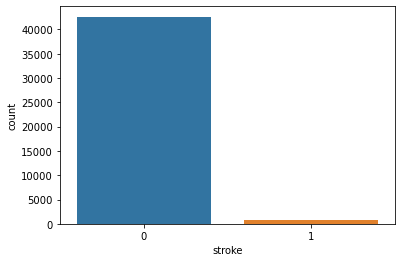

In [21]:
# Target variable  exploration
sns.countplot(x='stroke',data=train)

In [22]:
train['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [23]:
train['stroke'].value_counts(normalize=True)

0    0.981959
1    0.018041
Name: stroke, dtype: float64

extremely imbalanced dataset

## Univariate Analysis - Numerical variables

In [24]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True, color="green")
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

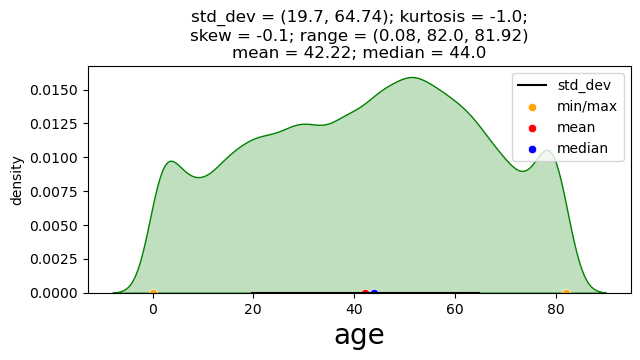

In [25]:
UVA_numeric(train,["age"])

### Age of Patients

In [26]:
train["age"].describe()

count    43400.000000
mean        42.217894
std         22.519649
min          0.080000
25%         24.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: age, dtype: float64

## Summary of Age
* Median age = 44
* most patients are in between 19 & 65
* skewness = -0.1062 more biased towards elder age
* Kurtosis =-1.0001, very less exreme value presence


### BMI of Patients

In [27]:
train["bmi"].describe() 

count    41938.000000
mean        28.605038
std          7.770020
min         10.100000
25%         23.200000
50%         27.700000
75%         32.900000
max         97.600000
Name: bmi, dtype: float64

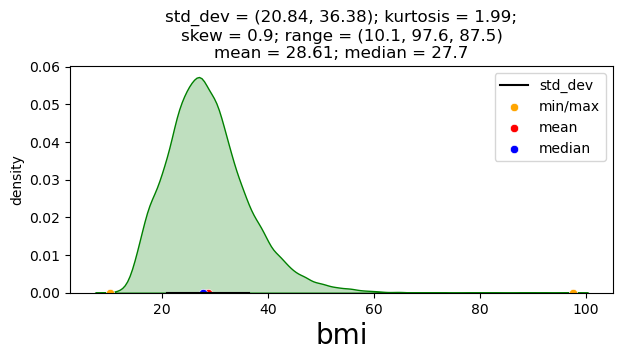

In [28]:
UVA_numeric(train,["bmi"])

In [29]:
# We observed that 1462 values are missing from BMI column.
# Showing records where patient suffered from stroke but had missing value in bmi attribute
train[train['bmi'].isna() & train['stroke'] == 1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
407,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,NaN,1
747,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,NaN,1
1139,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,NaN,1
1613,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
42530,43103,Male,66.0,0,0,Yes,Self-employed,Urban,182.89,NaN,never smoked,1
42839,47453,Female,67.0,1,0,Yes,Govt_job,Urban,234.43,NaN,never smoked,1
43007,20773,Female,69.0,0,1,Yes,Self-employed,Rural,89.19,NaN,smokes,1
43100,58018,Male,67.0,0,0,Yes,Self-employed,Urban,136.79,NaN,smokes,1


In [30]:
train[train['bmi'].isna() & train['stroke'] == 1].isna().sum()
# Out of 783 patients suffered stroke, 140 records are of BMI missing columns

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  140
smoking_status        50
stroke                 0
dtype: int64

In [31]:
# BMI Boxplot

<AxesSubplot:xlabel='bmi'>

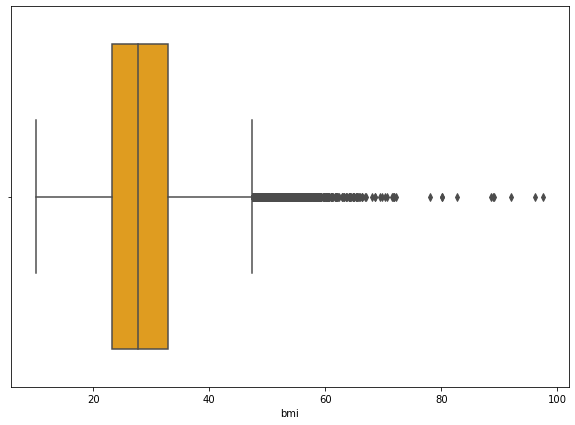

In [32]:
plt.figure(figsize=(10,7))
sns.boxplot(data=train ,x=train["bmi"],color='Orange')

In [33]:
# we have many outliers but before we fix this we must study BMI first.

In [34]:
train[train['bmi'] <11]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1384,38043,Female,1.24,0,0,No,children,Rural,122.04,10.3,NaN,0
6364,654,Female,0.88,0,0,No,children,Rural,85.76,10.6,NaN,0
14006,55384,Female,71.00,0,0,Yes,Govt_job,Rural,59.13,10.8,never smoked,0
16701,5406,Male,7.00,0,0,No,children,Rural,87.00,10.5,NaN,0
18136,10700,Female,1.56,0,0,No,children,Urban,72.00,10.3,NaN,0
26619,23130,Male,39.00,0,0,Yes,Private,Rural,75.90,10.1,smokes,0
30615,18093,Male,7.00,0,0,No,children,Urban,84.06,10.8,NaN,0
33849,39688,Male,0.56,0,0,No,children,Urban,62.27,10.8,NaN,0


In [35]:
train[train['bmi'] >80]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1913,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,NaN,0
4026,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0
6340,17812,Male,18.0,0,0,No,Govt_job,Urban,104.89,89.1,NaN,0
10322,64521,Male,6.0,0,0,No,children,Urban,58.33,96.1,NaN,0
25996,66027,Female,32.0,0,0,Yes,Private,Rural,79.09,88.6,NaN,0
30650,43946,Female,34.0,0,0,No,Private,Urban,199.13,80.1,never smoked,0
34824,53236,Female,47.0,1,0,Yes,Private,Urban,238.47,82.7,never smoked,0
38233,16403,Female,38.0,1,0,No,Private,Rural,93.59,80.2,NaN,0
43087,70198,Male,78.0,1,0,Yes,Private,Rural,135.73,89.0,never smoked,0


## Summary of BMI
* Median BMI = 27
* most BMI are in between 20 & 37
* skewness = 0.9 more skewed towards rightside
* Kurtosis =1.99, Extreme outlier presence 


## avg_glucose_level of Patients

In [36]:
train["avg_glucose_level"].describe()

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: avg_glucose_level, dtype: float64

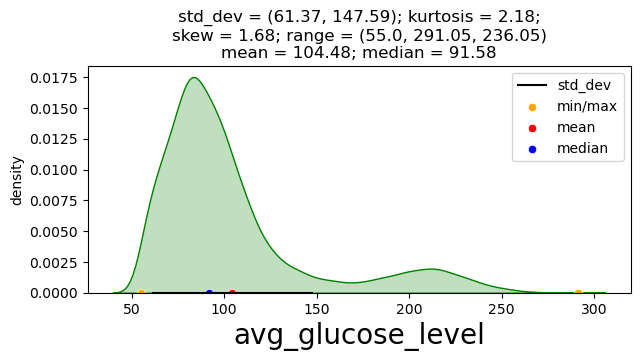

In [37]:
UVA_numeric(train,["avg_glucose_level"])

<AxesSubplot:xlabel='avg_glucose_level'>

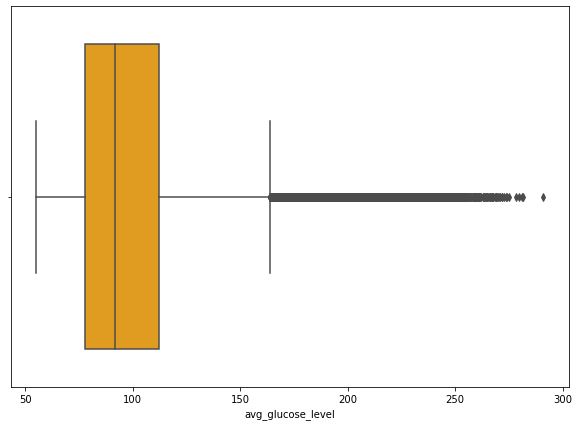

In [38]:
# BMI Boxplot

plt.figure(figsize=(10,7))
sns.boxplot(data=train ,x=train["avg_glucose_level"],color='Orange')

In [39]:
train[(train['avg_glucose_level']>250 ) & (train['stroke'] == 1)]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1902,54401,Male,80.0,0,1,Yes,Self-employed,Urban,252.72,30.5,formerly smoked,1
7066,13491,Male,80.0,0,0,Yes,Private,Rural,259.63,31.7,smokes,1
7985,71279,Female,71.0,0,0,Yes,Govt_job,Urban,263.32,38.7,never smoked,1
11868,69112,Male,68.0,1,1,Yes,Private,Rural,271.74,31.1,smokes,1
13196,20463,Male,81.0,1,1,Yes,Private,Urban,250.89,28.1,smokes,1
19828,48798,Male,79.0,1,0,Yes,Private,Urban,256.52,26.3,NaN,1
27159,15385,Female,56.0,0,1,Yes,Private,Rural,258.99,24.5,smokes,1
30738,27833,Male,77.0,1,0,Yes,Private,Urban,253.29,48.6,formerly smoked,1
34720,48211,Female,61.0,1,1,Yes,Private,Urban,251.99,41.4,formerly smoked,1
42302,4758,Female,79.0,1,0,Yes,Govt_job,Urban,260.91,25.0,never smoked,1


In [40]:
# we have many outliers but before we fix this we must study BMI first.

train[train['avg_glucose_level'] <56]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
32,45222,Male,58.0,1,0,No,Private,Urban,55.78,27.5,smokes,0
38,71750,Female,55.0,0,0,Yes,Private,Urban,55.42,24.8,NaN,0
199,61465,Male,13.0,0,0,No,children,Rural,55.39,23.2,NaN,0
419,50491,Male,78.0,0,0,Yes,Self-employed,Urban,55.32,29.6,smokes,0
443,61300,Male,20.0,0,0,No,Private,Urban,55.25,20.4,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
42900,36983,Female,18.0,0,0,No,Private,Rural,55.96,23.1,never smoked,0
42979,49549,Female,56.0,1,0,Yes,Private,Rural,55.95,44.4,NaN,0
42994,65095,Female,48.0,0,0,Yes,Private,Urban,55.24,25.5,never smoked,0
43174,47762,Male,75.0,1,0,Yes,Self-employed,Urban,55.73,NaN,never smoked,0


In [41]:
train[train['avg_glucose_level'] >250]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
139,63732,Male,70.0,1,0,Yes,Self-employed,Urban,251.60,27.1,never smoked,0
516,33585,Female,64.0,0,0,Yes,Private,Rural,250.20,27.4,NaN,0
546,17813,Female,69.0,0,1,Yes,Private,Rural,254.60,21.7,NaN,0
835,55862,Male,67.0,1,1,Yes,Private,Rural,254.63,31.0,never smoked,0
881,38678,Female,66.0,0,0,Yes,Self-employed,Rural,251.46,35.2,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43144,25431,Male,68.0,1,1,Yes,Private,Urban,260.41,39.1,formerly smoked,0
43175,2775,Male,47.0,0,0,No,Self-employed,Rural,250.28,26.8,smokes,0
43188,35518,Male,72.0,0,0,Yes,Private,Urban,252.51,54.7,formerly smoked,0
43228,27207,Male,41.0,1,0,Yes,Private,Rural,271.01,25.8,NaN,0


In [42]:
train["avg_glucose_level"].describe()

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: avg_glucose_level, dtype: float64

# Summary of avg_glucose_level

* Median avg_glucose_level = 91.58
* most avg_glucose_level are in between 61 and 148
* skewness = 1.68 more skewed towards rightside
* Kurtosis =2.18 Extreme outlier presence 


## Univariate Analysis : Categorical variables

In [43]:
# custom function for easy and efficient analysis of categorical univariate

def UVA_category(data, var_group):


  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

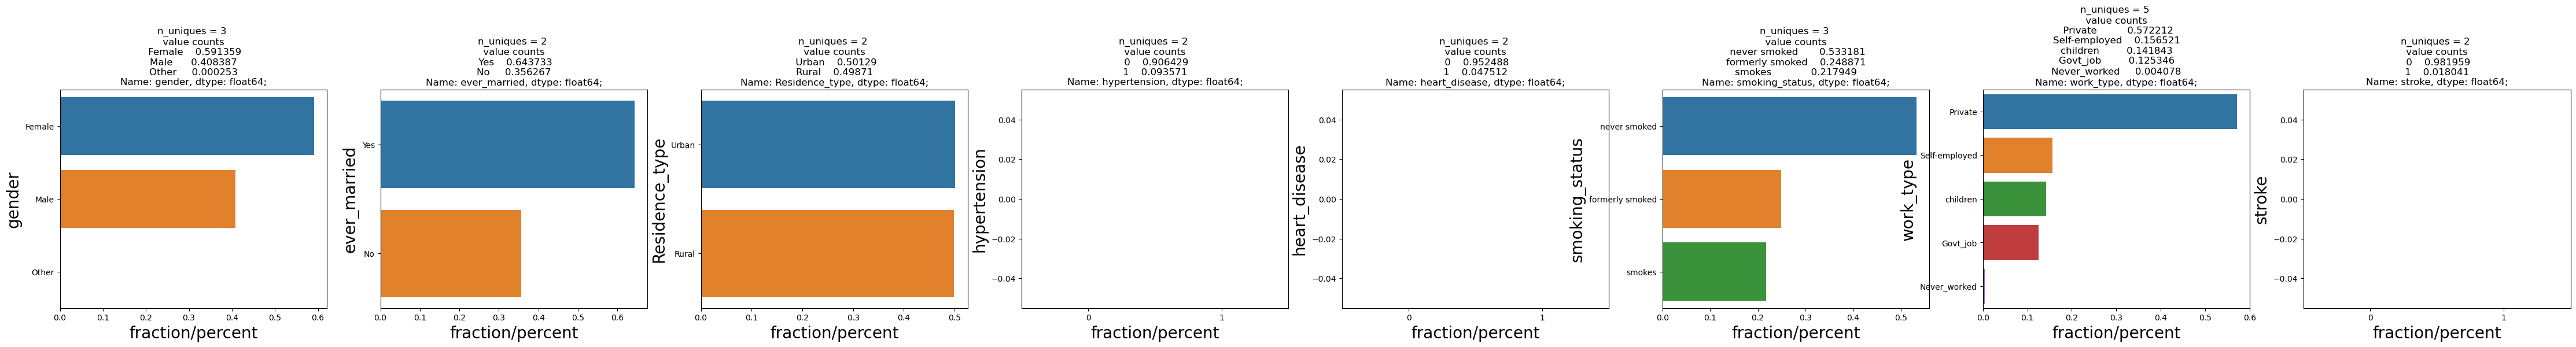

In [44]:
UVA_category(train, cat)

## Gender

In [45]:
#distribution of gender
train['gender'].value_counts(normalize=True)

Female    0.591359
Male      0.408387
Other     0.000253
Name: gender, dtype: float64

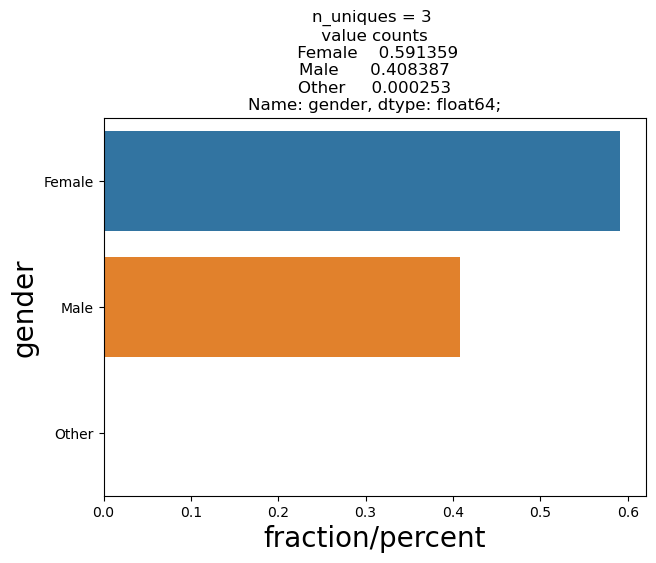

In [46]:
UVA_category(train, ["gender"])

In [47]:
#checking "Other" in gender column 
train[train['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2914,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0
10768,26188,Other,46.0,0,0,No,Private,Rural,83.28,NaN,never smoked,0
15620,52984,Other,27.0,0,0,No,Private,Urban,62.45,NaN,smokes,0
15838,24893,Other,53.0,0,0,Yes,Private,Rural,89.65,NaN,NaN,0
19748,13471,Other,39.0,0,0,Yes,Govt_job,Urban,95.59,32.0,formerly smoked,0
21041,31015,Other,19.0,0,0,No,Private,Rural,75.76,32.2,formerly smoked,0
21192,27043,Other,49.0,0,0,Yes,Private,Urban,94.88,37.2,never smoked,0
24252,51111,Other,51.0,0,0,Yes,Private,Rural,91.75,32.2,formerly smoked,0
26199,42452,Other,10.0,0,0,No,children,Rural,72.05,21.2,formerly smoked,0
26831,49812,Other,53.0,0,0,Yes,Govt_job,Urban,65.29,NaN,NaN,0


## Summary of Gender

* Approximately 60% of patients are Females and 40% patients are Males


## Married status

In [48]:
#distribution of ever_married

train['ever_married'].value_counts(normalize=True)

Yes    0.643733
No     0.356267
Name: ever_married, dtype: float64

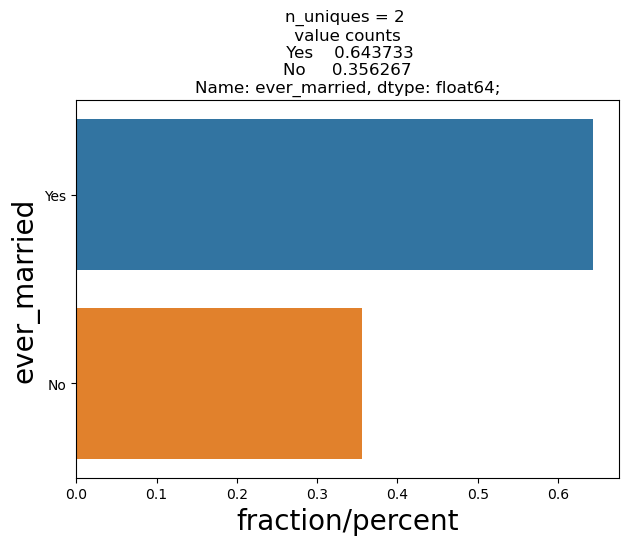

In [49]:
UVA_category(train, ["ever_married"])

## Summary of ever_married
* Approximately 64% of patients are married and 36% patients are not married


## Residence_type

In [50]:
#distribution of Residence_type

train['Residence_type'].value_counts(normalize=True)

Urban    0.50129
Rural    0.49871
Name: Residence_type, dtype: float64

## Summary of Residence_type
* Approximately 50 % of patients are Urban and Rural

## hypertension


In [51]:
#distribution of hypertension

train['hypertension'].value_counts(normalize=True)


0    0.906429
1    0.093571
Name: hypertension, dtype: float64

## Summary of hypertension
* Approximately 10 % of patients have hypertension and 90% dont

## heart_disease

In [52]:
#distribution of heart_disease

train['heart_disease'].value_counts(normalize=True)

0    0.952488
1    0.047512
Name: heart_disease, dtype: float64

## Summary of heart_disease
* Approximately 5 % of patients have heart_disease and 95% have dont

## WorkType

In [53]:
train['work_type'].value_counts(normalize=True)

Private          0.572212
Self-employed    0.156521
children         0.141843
Govt_job         0.125346
Never_worked     0.004078
Name: work_type, dtype: float64

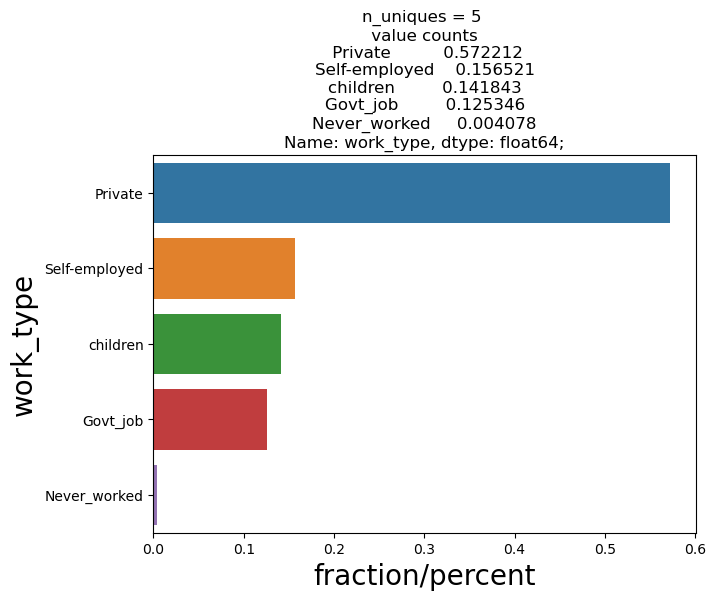

In [54]:
UVA_category(train, ["work_type"])

## Summary of work_type
* Private          57.2%
* Self-employed    15.6%
* children         14.1%
* Govt_job         12.5%
* Never_worked     00.4%

# Smoking Status 

In [55]:
train['smoking_status'].value_counts(normalize=True)

never smoked       0.533181
formerly smoked    0.248871
smokes             0.217949
Name: smoking_status, dtype: float64

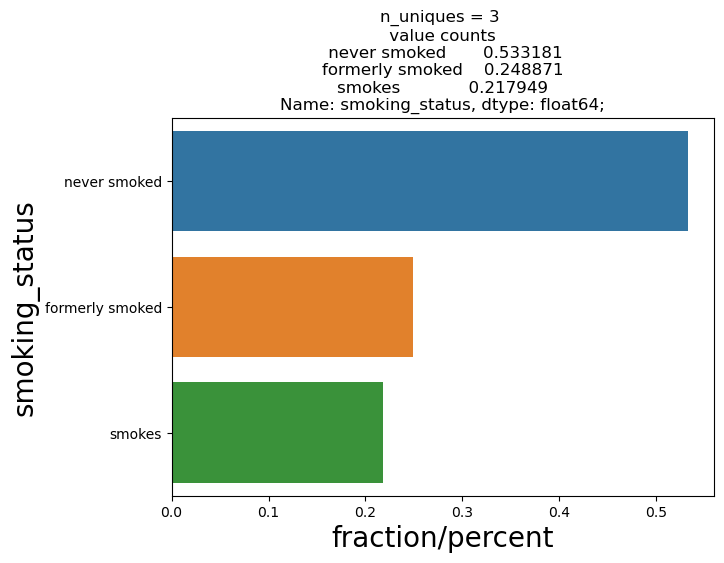

In [56]:
UVA_category(train, ["smoking_status"])

In [57]:
train[train['smoking_status'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
10,10460,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43382,35179,Female,9.0,0,0,No,children,Urban,68.49,16.8,NaN,0
43385,5366,Female,66.0,0,0,Yes,Self-employed,Urban,92.10,24.8,NaN,0
43389,30759,Male,14.0,0,0,No,children,Urban,82.48,24.8,NaN,0
43391,30077,Male,6.0,0,0,No,children,Urban,77.48,19.1,NaN,0


In [58]:
# We observed that 13292 values are missing from smoking_status column.
# Showing records where patient suffered from stroke but had missing value in smoking_status attribute
train[train['smoking_status'].isna() & train['stroke'] == 1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
407,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,NaN,1
426,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,NaN,1
747,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,NaN,1
1139,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,NaN,1
1315,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
42110,25740,Female,80.0,0,0,No,Private,Urban,222.87,NaN,NaN,1
42569,31686,Male,60.0,0,0,Yes,Private,Urban,88.57,44.6,NaN,1
43051,30364,Female,80.0,0,0,Yes,Self-employed,Rural,114.61,21.4,NaN,1
43130,39392,Female,82.0,0,1,Yes,Self-employed,Urban,118.61,29.4,NaN,1


In [59]:
train[train['smoking_status'].isna() & train['stroke'] == 1].isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                   50
smoking_status       145
stroke                 0
dtype: int64

In [60]:
# Out of 783 patients suffered stroke, 145 records are of smoking_status
# We observed that 13292 values are missing from smoking_status column.

In [61]:
train.smoking_status.unique()

[NaN, 'never smoked', 'formerly smoked', 'smokes']
Categories (3, object): ['formerly smoked', 'never smoked', 'smokes']

# Univariate: Missing Values

In [62]:
# finding number of missing values in every variable
train.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

Things to investigate further down:

BMI: Do the Patients with missing BMi values have some common behaviour in-
Stroke: do missing values have any relation with stroke?

Smoking status : Do the Patients with missing smokingstatus values have some common behaviour in-
Stroke: do missing values have any relation with stroke?

Do Smoking status missing values have any similar behaviour to age, worktype



## Summary : UVA


* #Numerical variables
   * "age" - Normal Distribution 
   * "bmi" - normal-right skewed -1462 missing values 
   *  ['bmi'] >80 is dropped
   *  "avg_glucose_level" - bimodal distribution
   *  ['avg_glucose_level']>275 is dropped

* #categorical
   * "gender" -['gender'] == 'Other'] is dropped
   * "smoking_status" -13292 values are missing
   * "stroke" - Highly Unbalanced dataset. ---> needs regularization , boosting , bagging

* column ['id'] is removed


## Bivariate Analysis : Numerical-Numerical

In [63]:
train.dtypes

id                      int64
gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

In [64]:
## data typecasting

train["gender"]= train["gender"].astype('category')
train["hypertension"]= train["hypertension"].astype('category')
train["heart_disease"]= train["heart_disease"].astype('category')
train["ever_married"]= train["ever_married"].astype('category')
train["work_type"]= train["work_type"].astype('category')
train["Residence_type"]= train["Residence_type"].astype('category')
train["smoking_status"]= train["smoking_status"].astype('category')
train["stroke"]= train["stroke"].astype('category')

train.dtypes

id                      int64
gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke               category
dtype: object

In [65]:
# isolating numerical datatypes
numerical = train.select_dtypes(include=['float64'])
numerical.dtypes

age                  float64
avg_glucose_level    float64
bmi                  float64
dtype: object

## Correlation Matrix

In [66]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,age,avg_glucose_level,bmi
age,1.000000,0.232311,0.358897
avg_glucose_level,0.232311,1.000000,0.191295
bmi,0.358897,0.191295,1.000000


## Heatmap Correlation

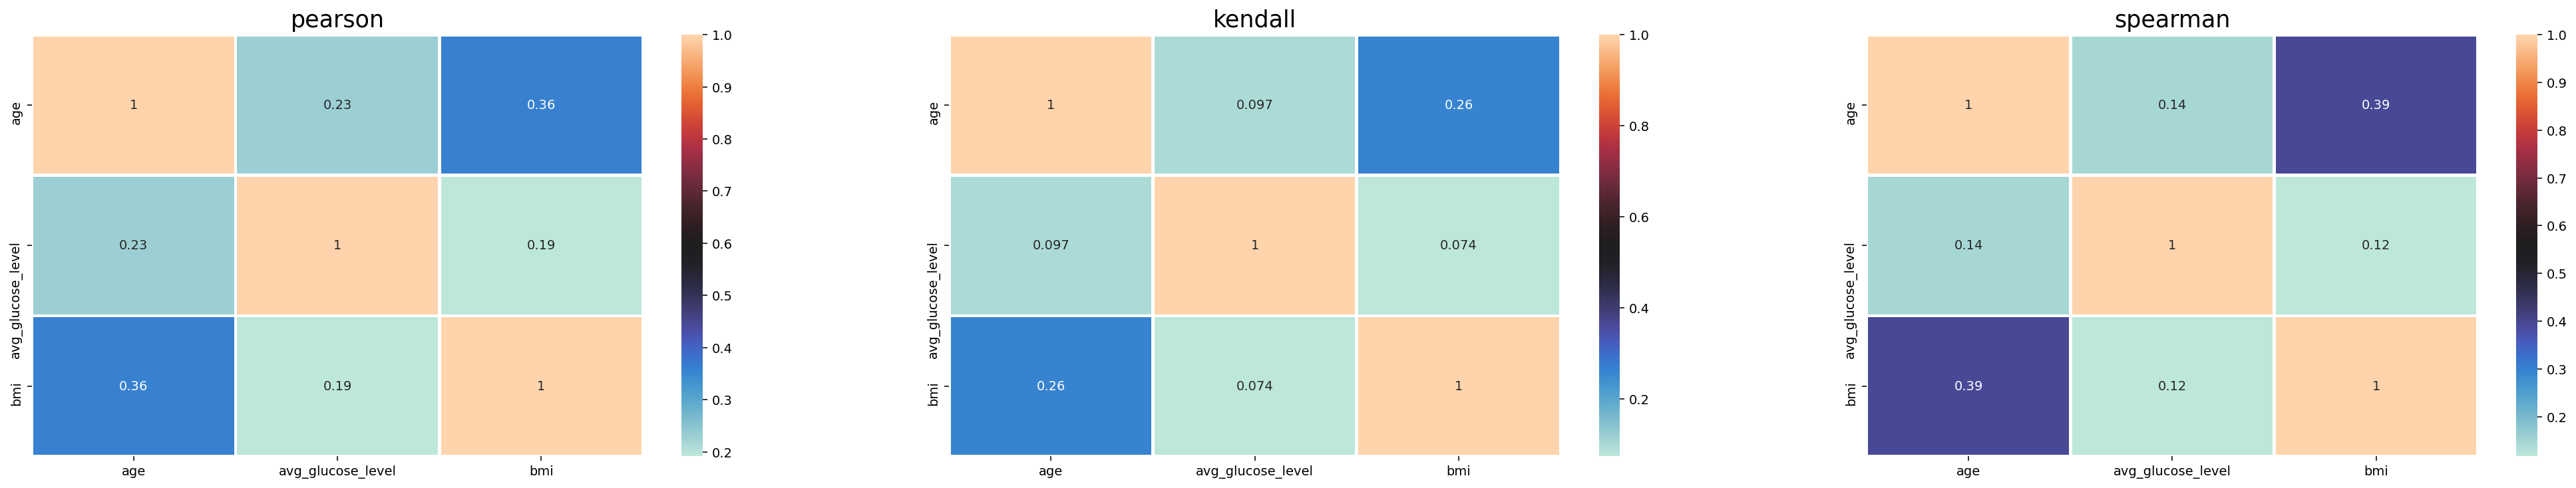

In [67]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2, annot=True, cmap="icefire")
  plt.title(i, fontsize=18)




### Age has correlation with
* BMI


### BMI has correlation with
* Age


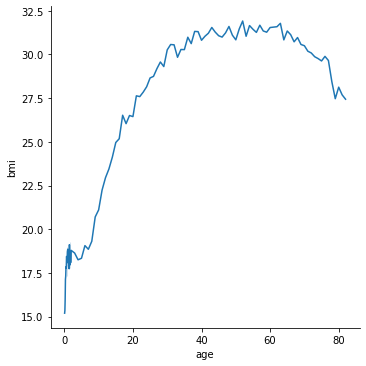

In [68]:
# Lineplot of Age with Bmi
sns.relplot(data=train, x="age", y="bmi", kind="line")

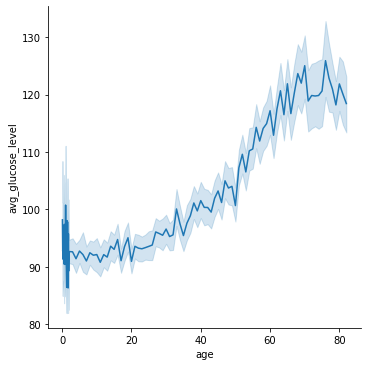

In [69]:
# Lineplot of Age with avg_glucose_level
sns.relplot(data=train, x="age", y="avg_glucose_level", kind="line")

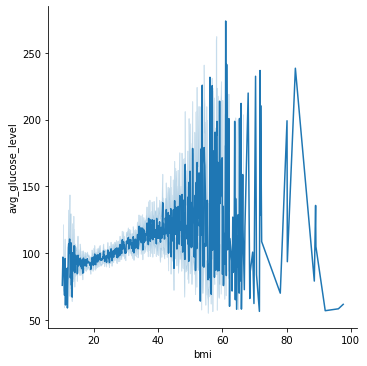

In [70]:
# Lineplot of Bmi with avg_glucose_level
sns.relplot(data=train, x="bmi", y="avg_glucose_level", kind="line")

## Scatterplot

In [71]:
NumVar=list(numerical)
NumVar

['age', 'avg_glucose_level', 'bmi']

<Figure size 840x560 with 0 Axes>

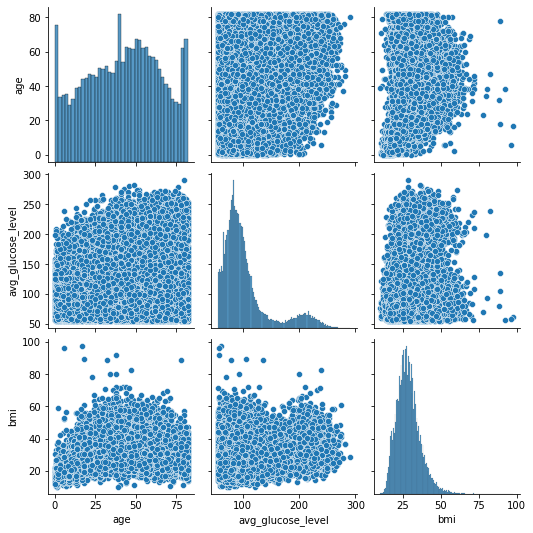

In [72]:
# scatter plot for Numerical variables
plt.figure(dpi=140)
sns.pairplot(numerical[NumVar])

* Average glucose level is high with old people
* BMI >60 have low average glucose.

## Bivariate Analysis: Continuous-Categorical variables

List of Hypothesis and investigation to perform under this combination.

1. Does chance of stroke increase with age ?
2. Does chance of stroke increase with BMI ?
3. Does chance of stroke increase with Glucose level ?

In [73]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [74]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [75]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

## 1. Does chance of stroke increase with age ?

In [76]:
# extracting age of people of who got stroke

Stroke_age= train[train['stroke'] == 1]['age']
Stroke_age

63       67.0
81       61.0
141      80.0
257      49.0
264      79.0
         ... 
43148    56.0
43268    69.0
43304    80.0
43318    62.0
43339    76.0
Name: age, Length: 783, dtype: float64

In [77]:
# calculating points of mean, median and standard deviation
mean = Stroke_age.mean()
median = Stroke_age.median()
stdev = Stroke_age.mean()- Stroke_age.std(), Stroke_age.mean()+Stroke_age.std() 

# checking
mean, median, stdev

(68.14344827586207, 71.0, (55.82691175045622, 80.45998480126792))

* The mean value of Age of Patients is 44 and the mean value of Age of Patients who are likely to have stroke is around 68

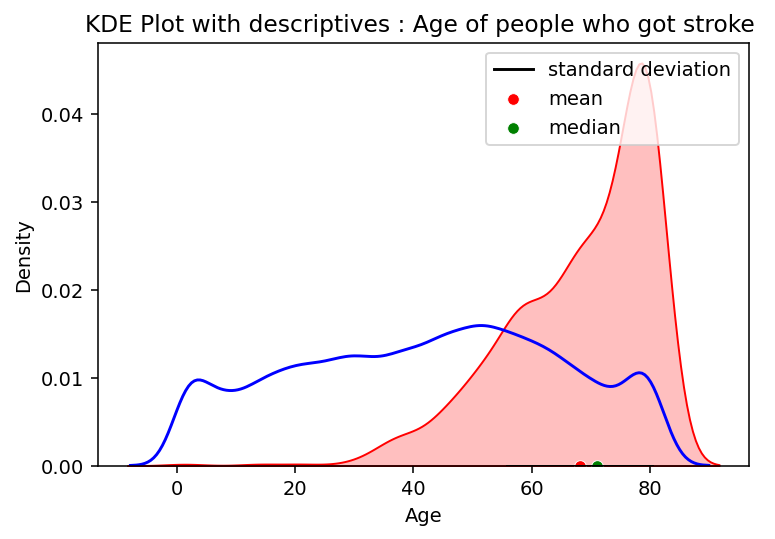

In [78]:
# plotting KDE plot with descriptives
plt.figure(dpi = 140)
sns.kdeplot(Stroke_age, shade = True, color= "red")
sns.kdeplot(train["age"], shade = False, color ="blue")
sns.scatterplot( [mean], [0], color='red', label='mean')
sns.scatterplot( [median], [0], color='green', label='median')
sns.lineplot( stdev, [0,0], color='black', label='standard deviation')
plt.xlabel("Age")
plt.ylabel('Density')
plt.title("KDE Plot with descriptives : Age of people who got stroke ")
plt.show()


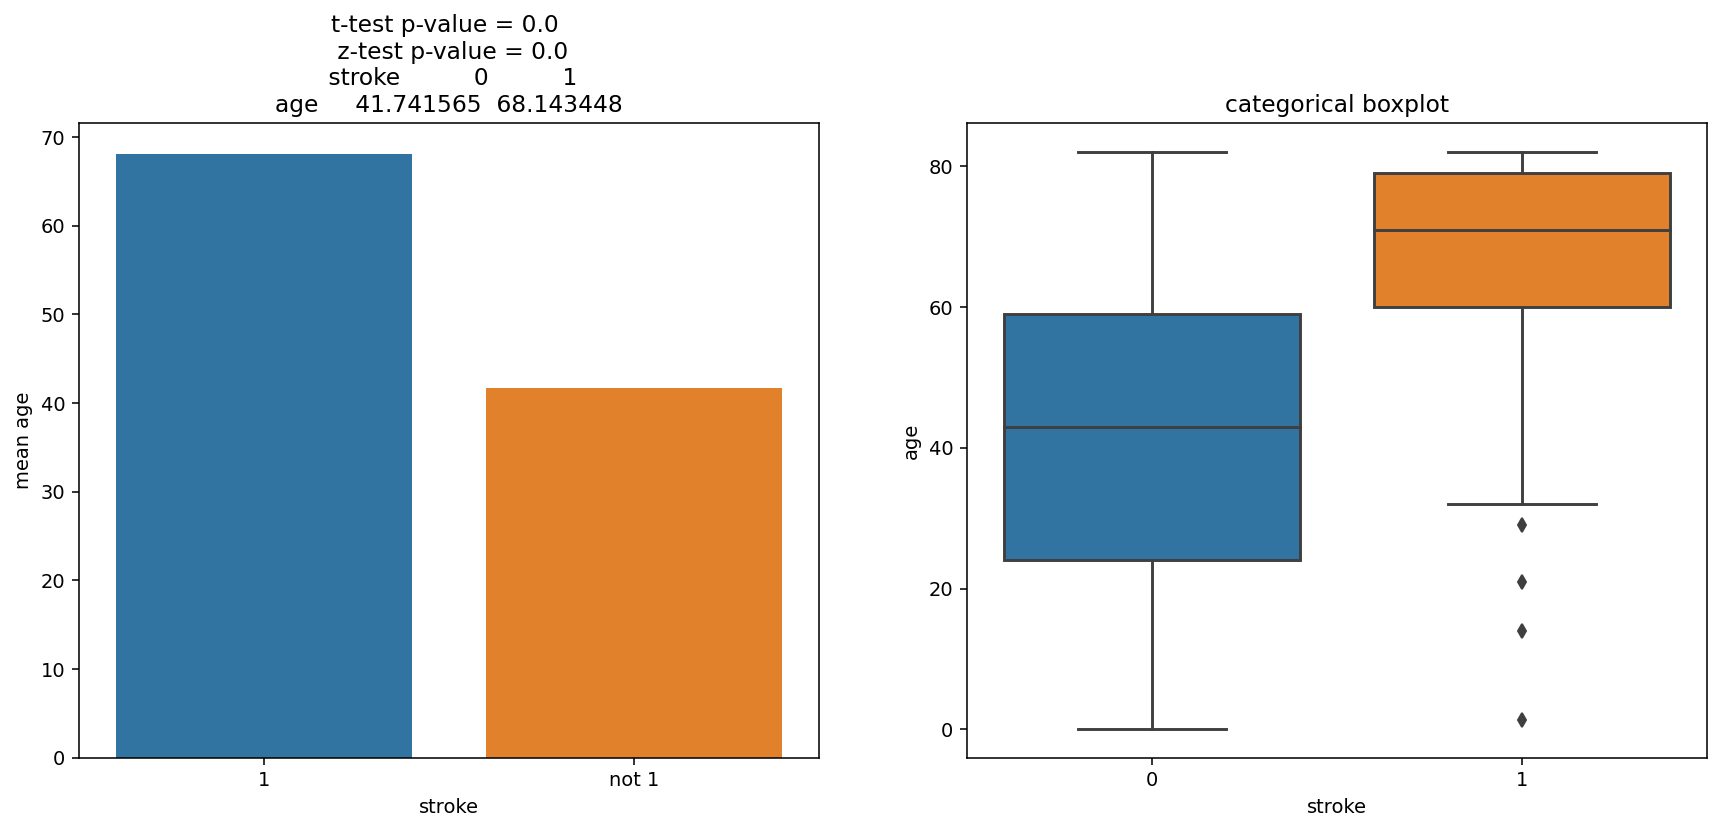

In [79]:
data =train
Bivariate_cont_cat(data, 'age', 'stroke', 1)

H0: Mean age of patients who got stroke and patients who didnt got stroke are not significantly different
* p value <.05, H0 is rejected.

### Inferences

with age, stroked happened more, results are significantly different.

We can safely reject the hypothesis that mean age of patients who got stroke and patients who didnt got stroke are not significant

## 2. Does chance of stroke increase with BMI ?


In [80]:
# extracting age of people of who got stroke

Stroke_bmi= train[train['stroke'] == 1]['bmi']
Stroke_bmi

63       36.6
81        NaN
141      32.5
257      34.4
264      24.0
         ... 
43148    32.9
43268    28.0
43304    26.7
43318    31.5
43339     NaN
Name: bmi, Length: 783, dtype: float64

In [81]:
# calculating points of mean, median and standard deviation
mean = Stroke_bmi.mean()
median = Stroke_bmi.median()
stdev = Stroke_bmi.mean()- Stroke_bmi.std(), Stroke_bmi.mean()+Stroke_bmi.std() 
# checking
mean, median, stdev

(29.86811819595645, 29.1, (23.523245560623756, 36.21299083128914))

* The mean value of Bmi of Patients is 28 and the mean value of Bmi of Patients who are likely to have stroke is around 29

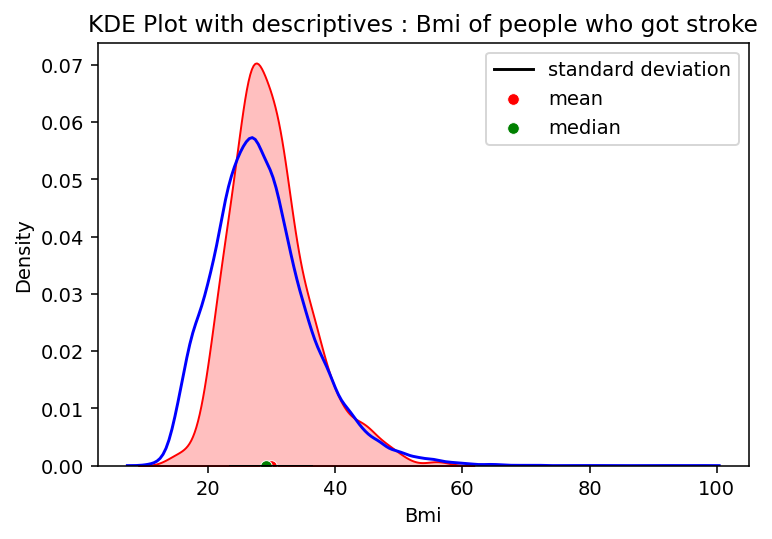

In [82]:

# plotting KDE plot with descriptives
plt.figure(dpi = 140)
sns.kdeplot(Stroke_bmi, shade = True, color = "red")
sns.kdeplot(train["bmi"], shade = False, color ="blue")
sns.scatterplot( [mean], [0], color='red', label='mean')
sns.scatterplot( [median], [0], color='green', label='median')
sns.lineplot( stdev, [0,0], color='black', label='standard deviation')
plt.xlabel("Bmi")
plt.ylabel('Density')
plt.title("KDE Plot with descriptives : Bmi of people who got stroke")
plt.show()

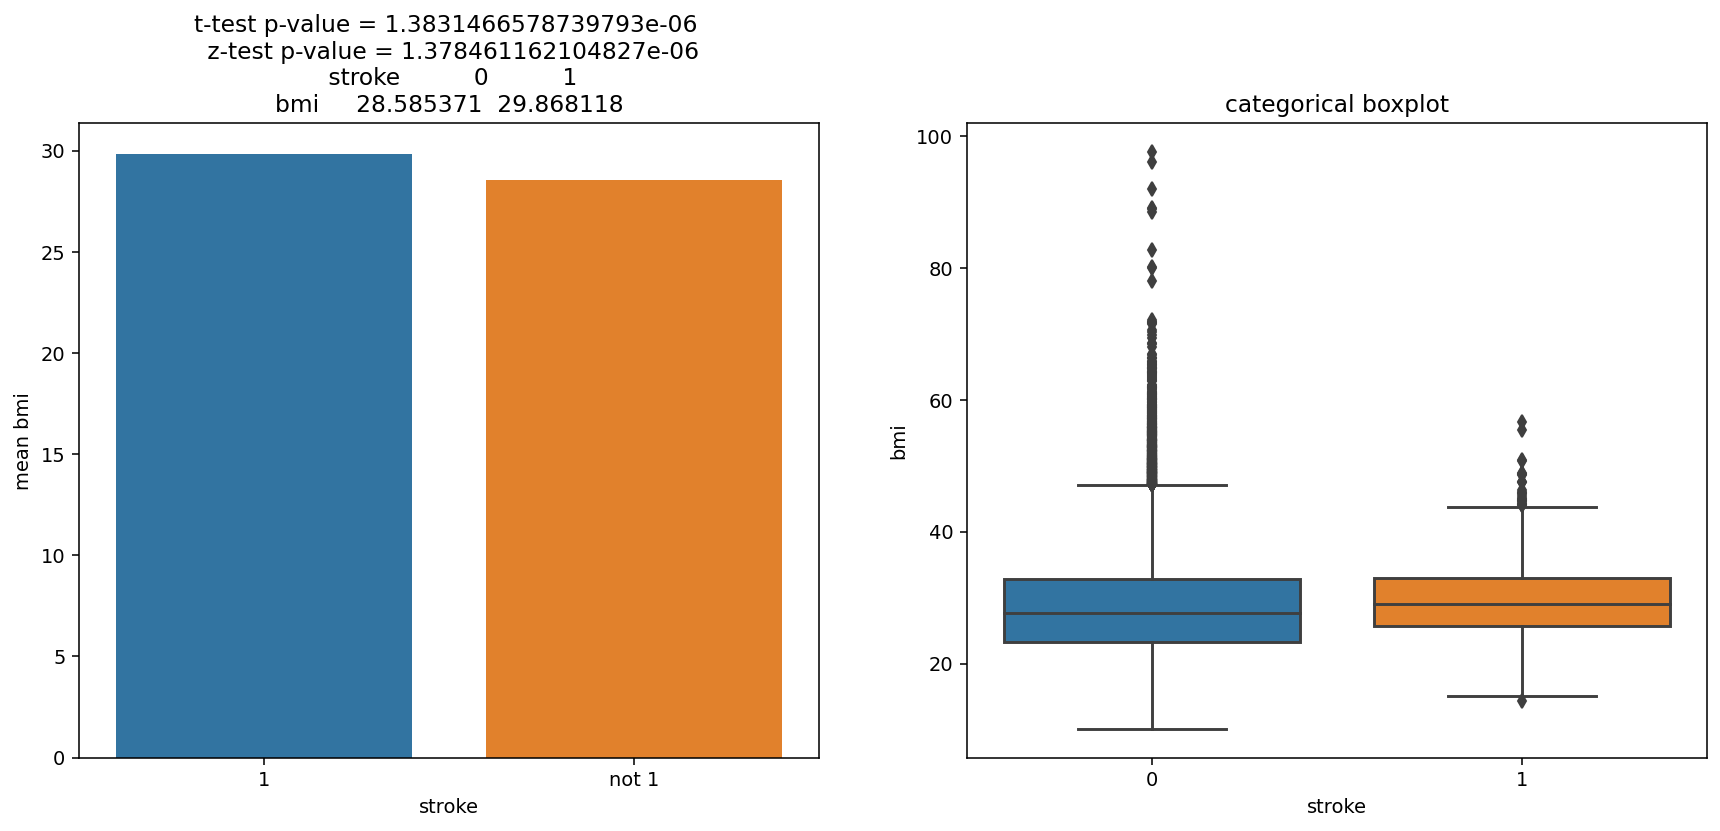

In [83]:
data =train
Bivariate_cont_cat(data, 'bmi', 'stroke', 1)


H0: Mean Bmi of patients who got stroke and patients who didnt got stroke are not significant
* p value >.05, H0 is accepted.

### Inferences

BMI have no significant difference between patients with stroke and who didnt.

In [84]:
# We observed that 1462 values are missing from BMI column.
# Out of 783 patients suffered stroke, 140 records are of BMI

## 3. Does chance of stroke increase with Glucose level ?


In [85]:
# extracting age of people of who got stroke

Stroke_avg_glucose_level= train[train['stroke'] == 1]['avg_glucose_level']
Stroke_avg_glucose_level

63       228.69
81       202.21
141      105.92
257      171.23
264      174.12
          ...  
43148     83.27
43268     97.36
43304     75.91
43318     77.97
43339    100.55
Name: avg_glucose_level, Length: 783, dtype: float64

In [86]:
# calculating points of mean, median and standard deviation
mean = Stroke_avg_glucose_level.mean()
median = Stroke_avg_glucose_level.median()
stdev = Stroke_avg_glucose_level.mean()- Stroke_avg_glucose_level.std(), Stroke_avg_glucose_level.mean()+Stroke_avg_glucose_level.std() 

# checking
mean, median, stdev

(129.58266922094504, 104.47, (69.8485964374319, 189.31674200445818))

* The mean value of avg_glucose_level of Patients is 104 and the mean value of avg_glucose_level of Patients who are likely to have stroke is around 129


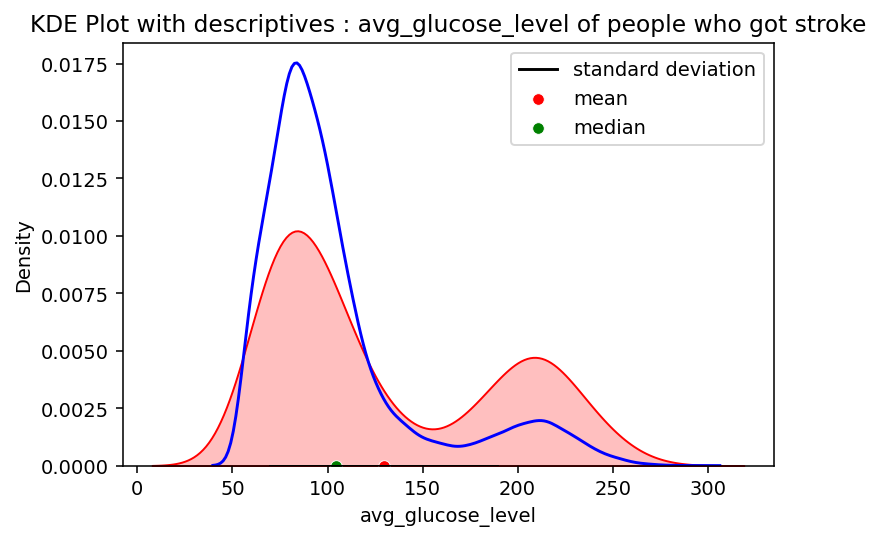

In [87]:
# plotting KDE plot with descriptives
plt.figure(dpi = 140)
sns.kdeplot(Stroke_avg_glucose_level, shade = True, color= "red")
sns.kdeplot(train["avg_glucose_level"], shade = False, color ="blue")

sns.scatterplot( [mean], [0], color='red', label='mean')
sns.scatterplot( [median], [0], color='green', label='median')
sns.lineplot( stdev, [0,0], color='black', label='standard deviation')
plt.xlabel("avg_glucose_level")
plt.ylabel('Density')
plt.title("KDE Plot with descriptives : avg_glucose_level of people who got stroke")
plt.show()


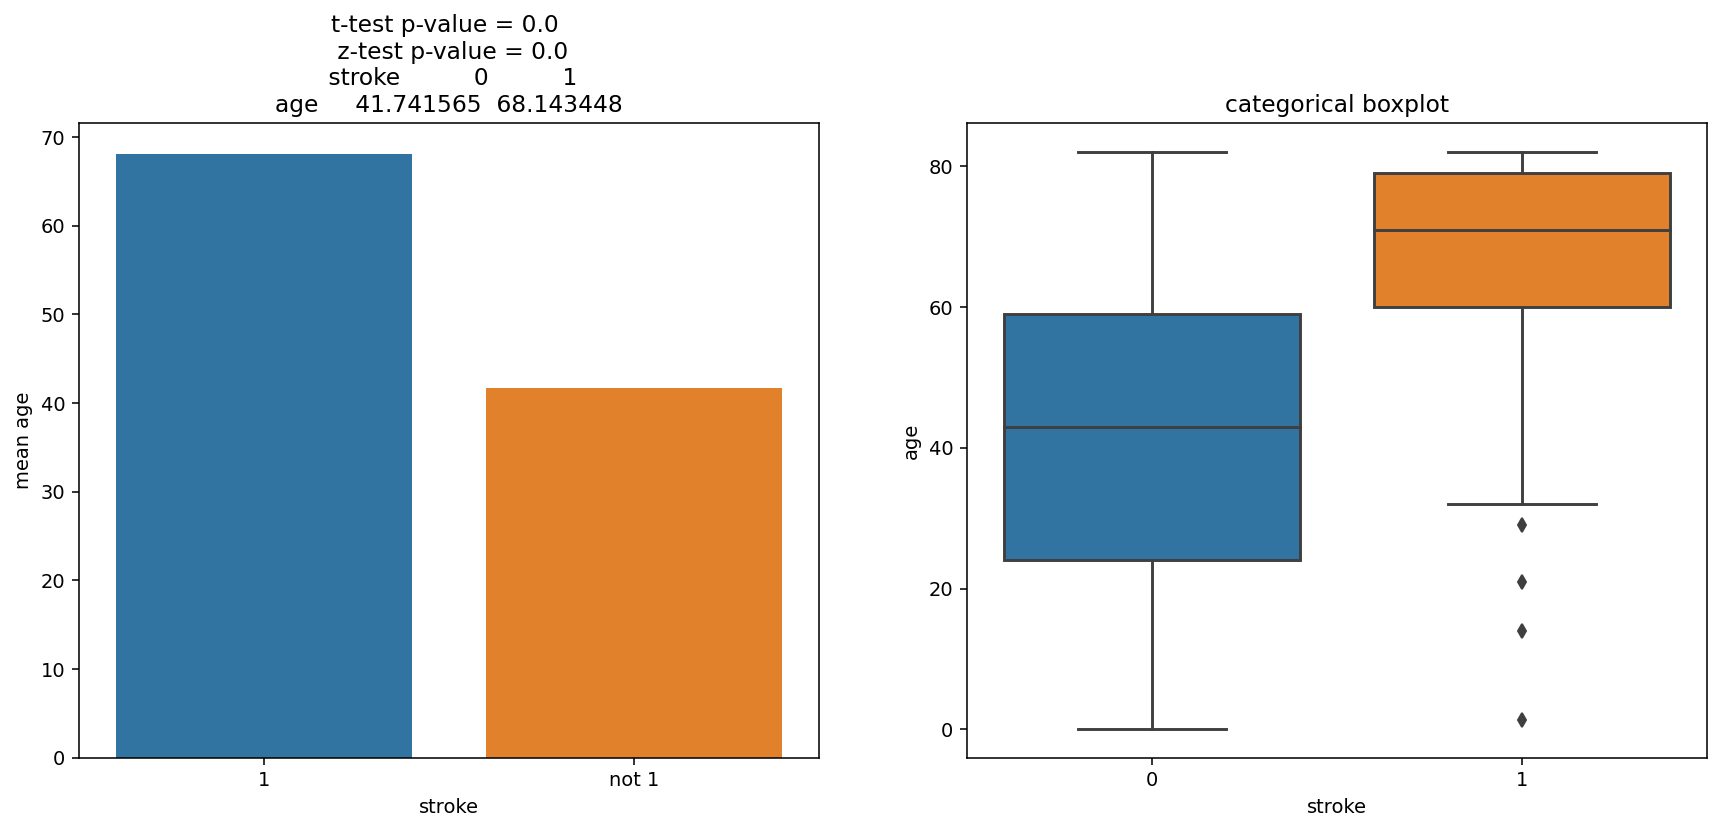

In [88]:
data =train
Bivariate_cont_cat(data, 'age', 'stroke', 1)

H0: Mean avg_glucose_level of patients who got stroke and patients who didnt got stroke are significant
* p value <.05, H0 is rejected.

### Inferences

avg_glucose_level have significant difference between patients with stroke and who didnt.

## Bivariate : Categorical-Categorical

#### List of Hypothesis to check under this combination
1.   Are Males more likely to have stroke than females?
2.   Are Married more likely to have stroke?
3.   Are patients with heart disease more likely to have stroke?
4.   Are patients with Hypertension more likely to have stroke?
5.   Are patients working in private sector & self employed more likely to have stroke?
6.   Are patients living in urban Residence_type more likely to have stroke?
4.   Are patients with smoking  more likely to have stroke?


**Missing Values** - finding behaviour

**smoking_status**:
  *  Do missing values have any relation with stroke


In [89]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

In [90]:
data= train

### 1.   Are Males more likely to have stroke than females?

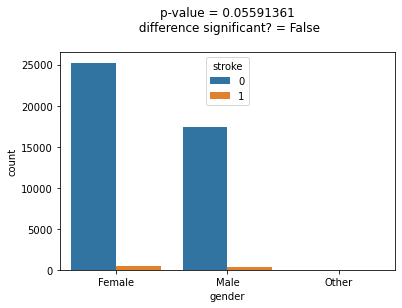

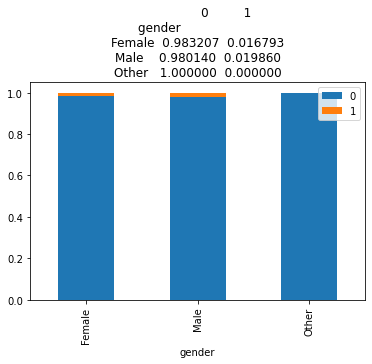

In [91]:
BVA_categorical_plot(data,'stroke','gender')

**Result**:

the difference between the males and females having stroke is not significant.

### 2.   Are Married more likely to have stroke?

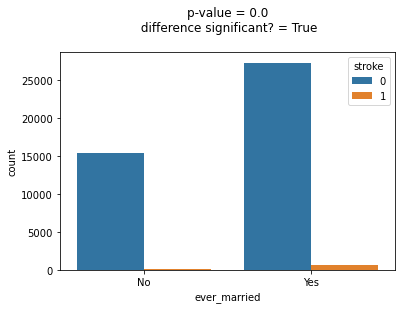

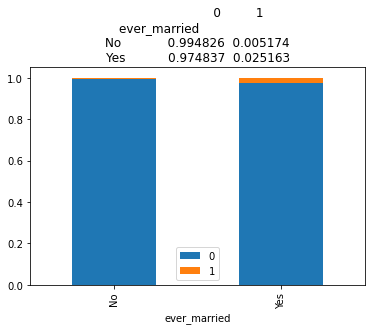

In [92]:
BVA_categorical_plot(data,'stroke','ever_married')

**Result**:
Married people are more prone to stroke.

### 3.   Are patients with heart disease more likely to have stroke?

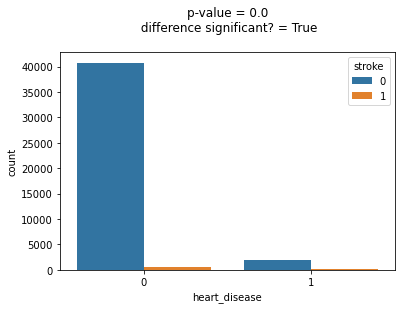

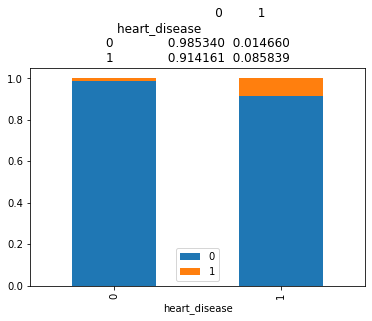

In [93]:
BVA_categorical_plot(data,'stroke','heart_disease')

**Result**:
patients with heart disease more likely to have stroke

### 4.   Are patients with Hypertension more likely to have stroke?

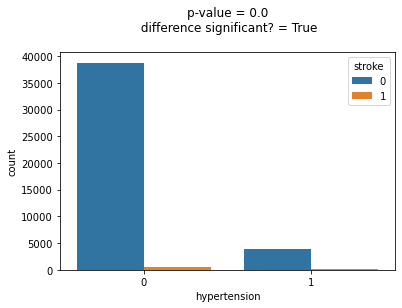

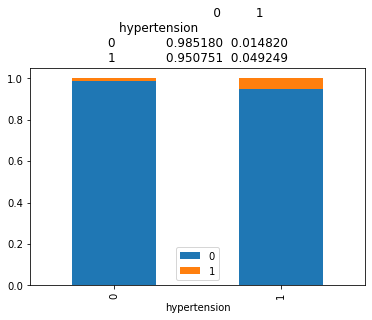

In [94]:
BVA_categorical_plot(data,'stroke','hypertension')

**Result**:
patients with Hypertension more likely to have stroke

### 5.  Does work_type have significant effect on stroke?

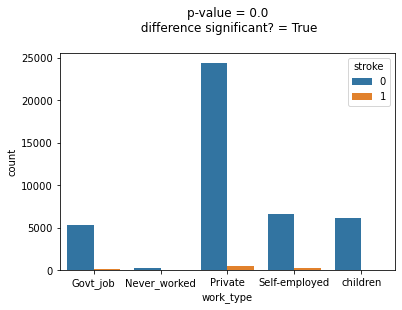

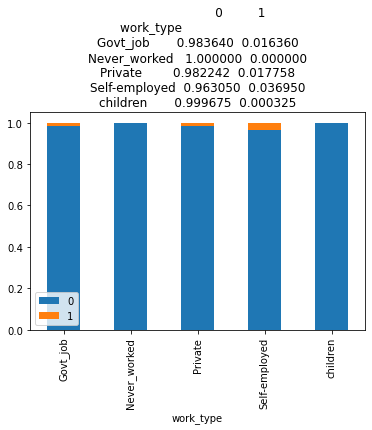

In [95]:
BVA_categorical_plot(data,'stroke','work_type')

**Result**:
 patients working in private sector & self employed more likely to have stroke

### 6.   Are patients living in urban Residence_type more likely to have stroke?

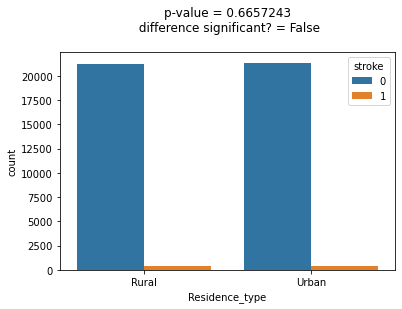

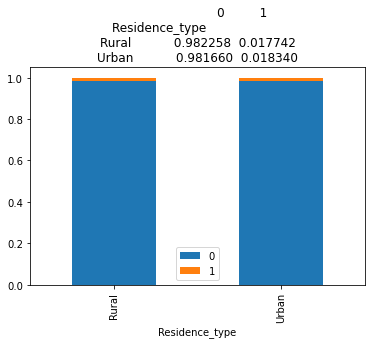

In [96]:
BVA_categorical_plot(data,'stroke','Residence_type')

**Result**:
Residence_type has no significant effect on the stroke.

### 7.   Are patients with smoking  more likely to have stroke?

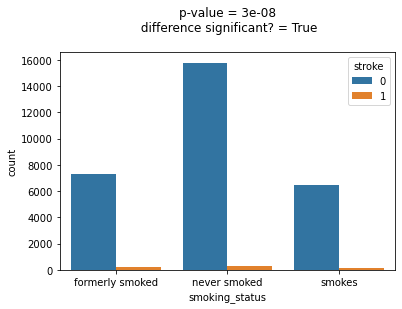

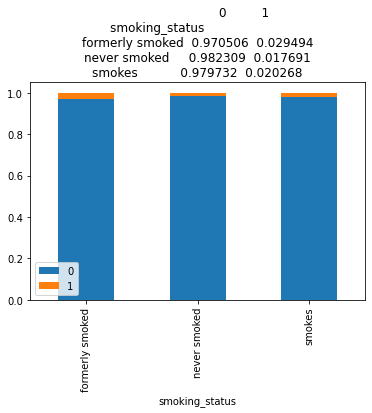

In [97]:
BVA_categorical_plot(data,'stroke','smoking_status')

**Result**:
patients with smoking history more likely to have stroke

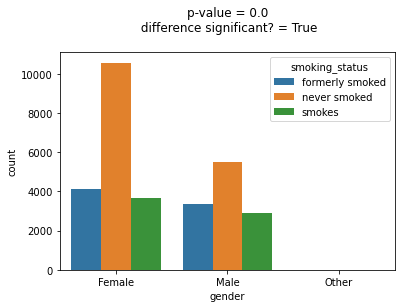

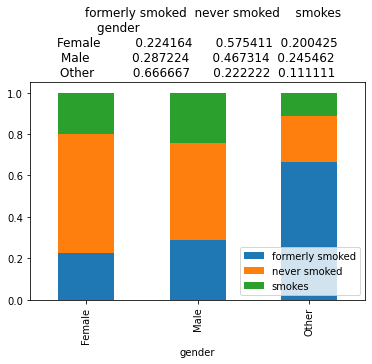

In [98]:
# Relation of smoking_status with gender
BVA_categorical_plot(data,'smoking_status', 'gender')

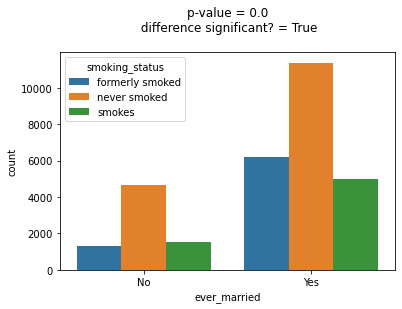

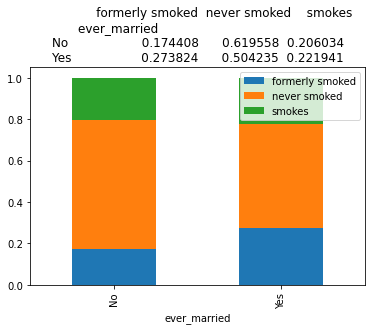

In [99]:
# Relation of smoking_status with ever_married
BVA_categorical_plot(data,'smoking_status', "ever_married")

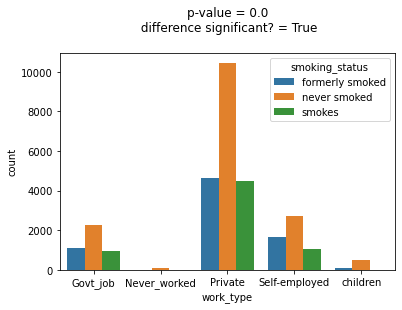

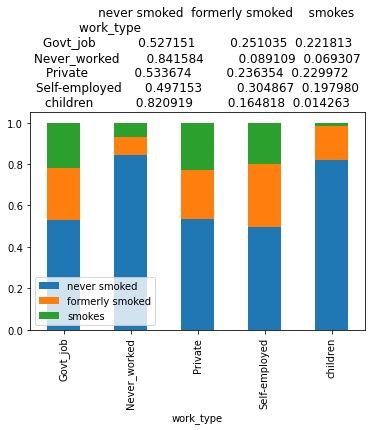

In [100]:
# Relation of smoking_status with work_type
BVA_categorical_plot(data,'smoking_status', "work_type")

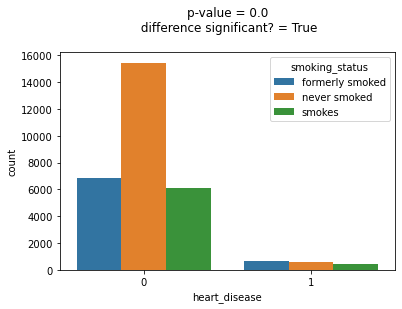

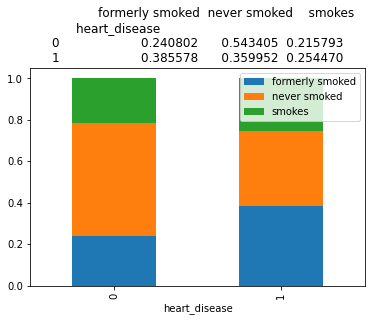

In [101]:
BVA_categorical_plot(data,'smoking_status', "heart_disease")

### Missing Values : smoking_status

* Do missing values have any relation with stroke?

In [102]:
# isolating rows with missing smoking_status
miss_smoking_status = data[:]
miss_smoking_status['missing_smoking_status'] = 'not_missing'
miss_smoking_status['missing_smoking_status'][~miss_smoking_status['smoking_status'].isin(['never smoked','formerly smoked', 'smokes'])] = 'missing value'

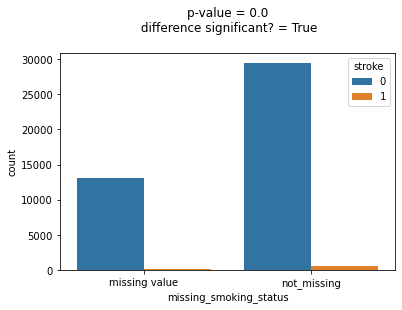

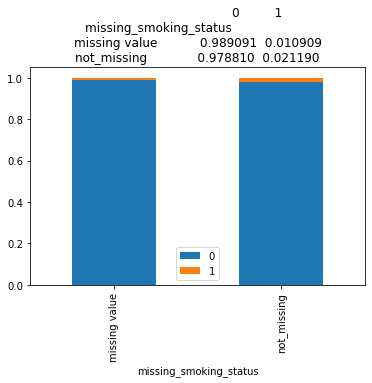

In [103]:
BVA_categorical_plot(miss_smoking_status, 'stroke', 'missing_smoking_status')

#### Missing values in smoking_status have significantly different stroke rate than the rest of the data.

# BVA Summary

## Summary : BVA

Age, BMI & glucose level are all correlated 

1. Average glucose level is high with old people
2. BMI >60 have low average glucose.
* We observed that 1462 values are missing from BMI column.
* Out of 783 patients suffered stroke, 140 records are of BMI

    



1. Does chance of stroke increase with age ? YES
The mean value of Age of Patients is 44 and the mean value of Age of Patients who are likely to have stroke is around 68. with age, stroked happened more, results are significantly different.

2. Does chance of stroke increase with Bmi ? No
BMI have no significant difference between patients with stroke and who didnt.

3. Does chance of stroke increase with avg_glucose_level ? YES
avg_glucose_level have significant difference between patients with stroke and who didnt.


* Married people are more prone to stroke.
* patients with heart disease more likely to have stroke
* patients with Hypertension more likely to have stroke
* patients working in private sector & self employed more likely to have stroke
* Residence_type has no significant effect on the stroke.
* patients with smoking history more likely to have stroke

** Missing values in smoking_status have significantly different stroke rate than the rest of the data.


## Multivariate Analysis 

### Pivot Table

### identifying the stroke patients Profile using multiple categorical features.

In [104]:
train["stroke"]= train["stroke"].astype('int64')

### 1. Gender, work_type, ever_married worth category with stroke

In [105]:
train.pivot_table('stroke', ['gender', 'work_type'], 'ever_married', aggfunc='sum')

ever_married          No  Yes
gender work_type             
Female Govt_job        5   53
       Never_worked    0    0
       Private        25  208
       Self-employed  15  123
       children        2    0
Male   Govt_job        3   28
       Never_worked    0    0
       Private        20  188
       Self-employed  10  103
       children        0    0
Other  Govt_job        0    0
       Never_worked    0    0
       Private         0    0
       Self-employed   0    0
       children        0    0

In [106]:
train.pivot_table('stroke', ['gender', 'work_type'], 'ever_married', aggfunc='mean')*100

ever_married                No       Yes
gender work_type                        
Female Govt_job       0.789889  1.978350
       Never_worked   0.000000  0.000000
       Private        0.548125  1.948660
       Self-employed  2.707581  3.528399
       children       0.067182       NaN
Male   Govt_job       0.802139  1.598174
       Never_worked   0.000000  0.000000
       Private        0.755002  2.707763
       Self-employed  2.770083  4.306020
       children       0.000000       NaN
Other  Govt_job            NaN  0.000000
       Private        0.000000  0.000000
       children       0.000000       NaN

Highest number of stroke patients are those married -self employed- Male patients

1. Proportion wise for Unmarried category, Approximately 2.7% Male & female self employed are having stroke
2. Proportion wise for married category, 4.3% male - self employeed are having stroke

**In all the cases, Self-employed Male & females are more likely to experience stroke**

**(Private & Govt) -married are also likely to have stroke**


### 2. Gender, Age, work_type with stroke Status

Let's use one continuous variable Age, and two categorical variables, Gender, and work_type to derive insights related to profiles of patients who got stroke.

In [107]:
age = pd.cut(train['age'], [0, 20, 50, 80])
train.pivot_table('stroke', ['gender', age], 'work_type', aggfunc='sum')

work_type        Govt_job  Never_worked  Private  Self-employed  children
gender age                                                               
Female (0, 20]          0             0        0              0         2
       (20, 50]         3             0       32              8         0
       (50, 80]        51             0      182            111         0
Male   (0, 20]          0             0        0              0         0
       (20, 50]         3             0       20              7         0
       (50, 80]        26             0      164             95         0
Other  (0, 20]          0             0        0              0         0
       (20, 50]         0             0        0              0         0
       (50, 80]         0             0        0              0         0

In [108]:
age = pd.cut(train['age'], [0, 20, 50, 80])
train.pivot_table('stroke', ['gender', age], 'work_type', aggfunc='mean')*100

work_type        Govt_job  Never_worked   Private  Self-employed  children
gender age                                                                
Female (0, 20]   0.000000           0.0  0.000000       0.000000  0.067182
       (20, 50]  0.176056           0.0  0.394623       0.703606       NaN
       (50, 80]  3.400000           0.0  3.337612       4.295666       NaN
Male   (0, 20]   0.000000           0.0  0.000000       0.000000  0.000000
       (20, 50]  0.300000           0.0  0.443459       1.001431       NaN
       (50, 80]  2.544031           0.0  4.202973       5.146262       NaN
Other  (0, 20]        NaN           NaN  0.000000            NaN  0.000000
       (20, 50]  0.000000           NaN  0.000000            NaN       NaN
       (50, 80]  0.000000           NaN  0.000000            NaN       NaN

We have created three bins for the age variable dividing age into 3 groups 0-20, 20-50 and 50-80

1. Highest number of Male patients are from self employed & private worktype of age group 50-80
2. Highest number of Female patients are from self employed followed by private worktype  & Govtjob of age group 50-80

### 3. Gender,Age,Occupation and avg_glucose_level with stroke Status

In [109]:
glucose = pd.qcut(train['avg_glucose_level'], 3)
train.pivot_table('stroke', ['gender', age], [glucose, 'work_type'], aggfunc='sum')

avg_glucose_level (54.999, 82.16]                                              \
work_type                Govt_job Never_worked Private Self-employed children   
gender age                                                                      
Female (0, 20]                  0            0       0             0        2   
       (20, 50]                 2            0      12             0        0   
       (50, 80]                10            0      44            37        0   
Male   (0, 20]                  0            0       0             0        0   
       (20, 50]                 1            0      11             1        0   
       (50, 80]                 7            0      34            24        0   
Other  (0, 20]                  0            0       0             0        0   
       (20, 50]                 0            0       0             0        0   
       (50, 80]                 0            0       0             0        0   

avg_glucose_level (82.16, 103.3]                                              \
work_type               Govt_job Never_worked Private Self-employed children   
gender age                                                                     
Female (0, 20]                 0            0       0             0        0   
       (20, 50]                1            0      11             4        0   
       (50, 80]                6            0      44            21        0   
Male   (0, 20]                 0            0       0             0        0   
       (20, 50]                1            0       5             2        0   
       (50, 80]                4            0      38            24        0   
Other  (0, 20]                 0            0       0             0        0   
       (20, 50]                0            0       0             0        0   
       (50, 80]                0            0       0             0        0   

avg_glucose_level (103.3, 291.05]                                              
work_type                Govt_job Never_worked Private Self-employed children  
gender age                                                                     
Female (0, 20]                  0            0       0             0        0  
       (20, 50]                 0            0       9             4        0  
       (50, 80]                35            0      94            53        0  
Male   (0, 20]                  0            0       0             0        0  
       (20, 50]                 1            0       4             4        0  
       (50, 80]                15            0      92            47        0  
Other  (0, 20]                  0            0       0             0        0  
       (20, 50]                 0            0       0             0        0  
       (50, 80]                 0            0       0             0        0

In [110]:
glucose = pd.qcut(train['avg_glucose_level'], 3)
train.pivot_table('stroke', ['gender', age], [glucose, 'work_type'], aggfunc='mean')*100

avg_glucose_level (54.999, 82.16]                                       \
work_type                Govt_job Never_worked   Private Self-employed   
gender age                                                               
Female (0, 20]           0.000000          0.0  0.000000      0.000000   
       (20, 50]          0.325203          0.0  0.418556      0.000000   
       (50, 80]          2.155172          NaN  2.736318      4.946524   
Male   (0, 20]           0.000000          0.0  0.000000      0.000000   
       (20, 50]          0.279330          0.0  0.701978      0.432900   
       (50, 80]          2.250804          NaN  3.006189      4.580153   
Other  (0, 20]                NaN          NaN  0.000000           NaN   
       (20, 50]               NaN          NaN  0.000000           NaN   
       (50, 80]          0.000000          NaN       NaN           NaN   

avg_glucose_level           (82.16, 103.3]                         \
work_type          children       Govt_job Never_worked   Private   
gender age                                                          
Female (0, 20]     0.179695       0.000000          0.0  0.000000   
       (20, 50]         NaN       0.170648          0.0  0.375299   
       (50, 80]         NaN       1.312910          NaN  2.600473   
Male   (0, 20]     0.000000       0.000000          0.0  0.000000   
       (20, 50]         NaN       0.308642          0.0  0.315856   
       (50, 80]         NaN       1.459854          NaN  3.435805   
Other  (0, 20]     0.000000            NaN          NaN       NaN   
       (20, 50]         NaN       0.000000          NaN  0.000000   
       (50, 80]         NaN            NaN          NaN  0.000000   

avg_glucose_level                        (103.3, 291.05]               \
work_type         Self-employed children        Govt_job Never_worked   
gender age                                                              
Female (0, 20]         0.000000      0.0        0.000000          0.0   
       (20, 50]        0.970874      NaN        0.000000          NaN   
       (50, 80]        2.573529      NaN        6.044905          0.0   
Male   (0, 20]         0.000000      0.0        0.000000          0.0   
       (20, 50]        0.819672      NaN        0.314465          0.0   
       (50, 80]        4.705882      NaN        3.432494          0.0   
Other  (0, 20]              NaN      0.0             NaN          NaN   
       (20, 50]             NaN      NaN             NaN          NaN   
       (50, 80]             NaN      NaN             NaN          NaN   

avg_glucose_level                                   
work_type           Private Self-employed children  
gender age                                          
Female (0, 20]     0.000000      0.000000      0.0  
       (20, 50]    0.389442      1.162791      NaN  
       (50, 80]    4.366001      5.196078      NaN  
Male   (0, 20]     0.000000      0.000000      0.0  
       (20, 50]    0.294118      1.785714      NaN  
       (50, 80]    5.525526      5.788177      NaN  
Other  (0, 20]          NaN           NaN      NaN  
       (20, 50]    0.000000           NaN      NaN  
       (50, 80]         NaN           NaN      NaN

Glucose is divided into 3 quantiles
It is visible at first look that for high glucose level more number of stroke
for Females with Govt_job, stroke chance increase with 50--80 age range
for Females Self-employed, stroke chance increase with 50--80 age range

for Males, stroke chance increase with 50--80 age range


In [111]:
train.pivot_table('stroke', ['gender', age], ["smoking_status"], aggfunc='sum')

smoking_status   formerly smoked  never smoked  smokes
gender age                                            
Female (0, 20]                 0             0       0
       (20, 50]                9            15      12
       (50, 80]               81           156      51
Male   (0, 20]                 0             0       0
       (20, 50]                6            10       6
       (50, 80]              105            64      59
Other  (0, 20]                 0             0       0
       (20, 50]                0             0       0
       (50, 80]                0             0       0

In [112]:
train.pivot_table('stroke', ['gender', age], ["smoking_status"], aggfunc='mean')*100

smoking_status   formerly smoked  never smoked    smokes
gender age                                              
Female (0, 20]          0.000000      0.000000  0.000000
       (20, 50]         0.563557      0.296795  0.565504
       (50, 80]         3.661844      3.741007  3.736264
Male   (0, 20]          0.000000      0.000000  0.000000
       (20, 50]         0.614754      0.403388  0.404313
       (50, 80]         4.964539      3.030303  4.660348
Other  (0, 20]          0.000000           NaN       NaN
       (20, 50]         0.000000      0.000000  0.000000
       (50, 80]         0.000000           NaN       NaN

females and males in age 50-80 are having high chance of stroke irrespective of smoke history

In [113]:
train.pivot_table('stroke', ['gender', age, "work_type"], ["hypertension"], aggfunc='mean')*100

hypertension                          0         1
gender age      work_type                        
Female (0, 20]  Govt_job       0.000000       NaN
                Never_worked   0.000000       NaN
                Private        0.000000  0.000000
                Self-employed  0.000000       NaN
                children       0.067204  0.000000
       (20, 50] Govt_job       0.184615  0.000000
                Never_worked   0.000000       NaN
                Private        0.346331  1.597444
                Self-employed  0.552486  3.921569
       (50, 80] Govt_job       3.078137  5.150215
                Never_worked   0.000000       NaN
                Private        3.118779  4.399142
                Self-employed  3.352490  8.266129
Male   (0, 20]  Govt_job       0.000000  0.000000
                Never_worked   0.000000       NaN
                Private        0.000000  0.000000
                Self-employed  0.000000       NaN
                children       0.000000  0.000000
       (20, 50] Govt_job       0.328947  0.000000
                Never_worked   0.000000       NaN
                Private        0.402176  1.060071
                Self-employed  0.975610  1.190476
       (50, 80] Govt_job       2.021403  4.972376
                Never_worked   0.000000  0.000000
                Private        3.830455  5.857741
                Self-employed  5.138607  5.177112
Other  (0, 20]  Private        0.000000       NaN
                children       0.000000       NaN
       (20, 50] Govt_job       0.000000       NaN
                Private        0.000000       NaN
       (50, 80] Govt_job       0.000000       NaN
                Private        0.000000       NaN

In [114]:
# Multivariate scatterplot - Age,avg_glucose_level, stroke

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

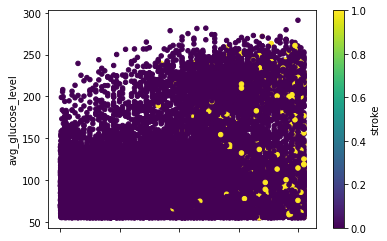

In [115]:
train.plot.scatter(x='age', y='avg_glucose_level', c='stroke', colormap='viridis')

## Box Plot

In [116]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')


### Age, work_type, Stroke

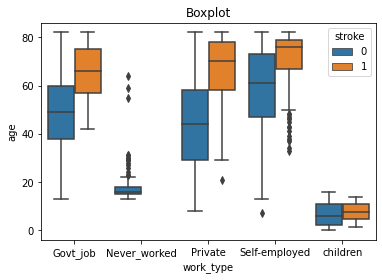

In [117]:
Grouped_Box_Plot(train,'age', 'work_type', 'stroke')

We can notice here that

For govt-job profession,private, self employed stroke patients are elder than no stroke patients

for children age are similar

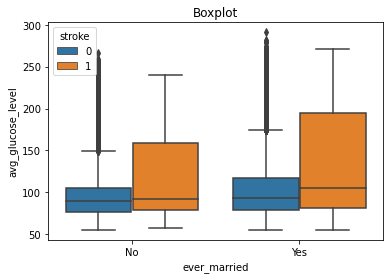

In [118]:
Grouped_Box_Plot(train,'avg_glucose_level', 'ever_married', 'stroke')

avg_glucose_level and stroke chance high for married persons

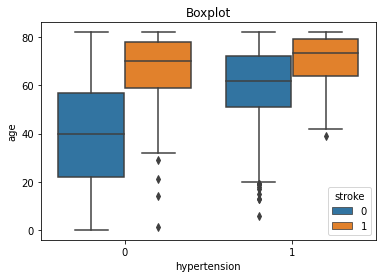

In [119]:
Grouped_Box_Plot(train,'age', 'hypertension', 'stroke')

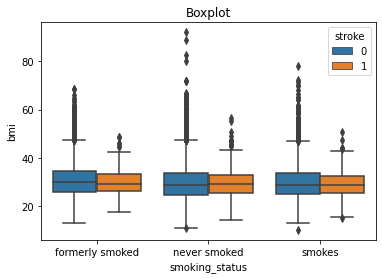

In [120]:
Grouped_Box_Plot(train,'bmi', 'smoking_status', 'stroke')

BMI is almost same for stroke and non stroke patients irrespective of smoking status 

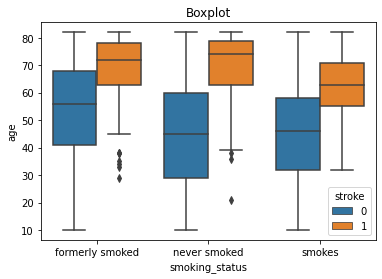

In [121]:
Grouped_Box_Plot(train, "age", 'smoking_status', 'stroke')

# Summary EDA

### Summary : UVA 
Numerical variables

1. "age" - Normal Distribution
2. "bmi" - normal-right skewed -1462 missing values
['bmi'] >80 is dropped
3. "avg_glucose_level" - bimodal distribution
['avg_glucose_level']>275 is dropped
#categorical

* "gender" -['gender'] == 'Other'] is dropped
* "smoking_status" -13292 values are missing
* "stroke" - Highly Unbalanced dataset.
* column ['id'] is removed

### Summary : BVA
Age, BMI & glucose level are all correlated

* Average glucose level is high with old people
* BMI >60 have low average glucose.
* We observed that 1462 values are missing from BMI column.
Out of 783 patients suffered stroke, 140 records are of BMI
* Does chance of stroke increase with age ?
 YES The mean value of Age of Patients is 44 and the mean value of Age of Patients who are likely to have stroke is around 68. with age, stroked happened more, results are significantly different.

Does chance of stroke increase with Bmi ? No BMI have no significant difference between patients with stroke and who didnt.

Does chance of stroke increase with avg_glucose_level ? YES avg_glucose_level have significant difference between patients with stroke and who didnt.

* The difference between the males and females having stroke is not significant.
* Married people are more prone to stroke.
* patients with heart disease more likely to have stroke
* patients with Hypertension more likely to have stroke
* patients working in private sector & self employed more likely to have stroke
* Residence_type has no significant effect on the stroke.
* patients with smoking history more likely to have stroke

** Missing values in smoking_status have significantly different stroke rate than the rest of the data.

### Multivariate Analysis

1. Gender, work_type, ever_married worth category with stroke
Highest number of stroke patients are those married -self employed- Male patients

* Proportion wise for Unmarried category, Approximately 2.7% Male & female self employed are having stroke
* Proportion wise for married category, 4.3% male - self employeed are having stroke
* In all the cases married status, Self-employed Male & females are more likely to experience stroke



2. Gender, Age, work_type with stroke Status
We have created three bins for the age variable dividing age into 3 groups 0-20, 20-50 and 50-80

* Highest number of Male patients are from self employed & private worktype of age group 50-80
* Highest number of Female patients are from self employed followed by private worktype & Govtjob of age group 50-80


3. Gender,Age,Occupation and avg_glucose_level with Churning Status
Glucose is divided into 3 quantiles.
* It is visible at first look that for high glucose level more number of stroke for Females with Govt_job,
* stroke chance increase with 50--80 age range for Females Self-employed,
* stroke chance increase with 50--80 age range
* for Males, stroke chance increase with 50--80 age range

* females and males in age 50-80 are having high chance of stroke irrespective of smoke history

### Age, work_type, Stroke
We can notice here that

* For govt-job profession,private, self employed ,stroke patients are elder than no stroke patients
* for children age are similar

* avg_glucose_level and stroke chance high for married persons
* BMI is almost same for stroke and non stroke patients irrespective of smoking status

In [122]:
data= dataorg.copy()
test = testorg.copy()


# Step 4: Prepare submission file and remove unwanted columns

In [123]:
# Prepare submission file

submission = pd.DataFrame() # Create a submission dataframe
submission['id'] = test['id'] # Copy Loan_ID column values from test dataset to submission dataframe

In [124]:
# Drop unwanted columns
data.drop(['id'],axis=1,inplace=True) # Delete ID from training dataset 
test.drop(['id'],axis=1,inplace=True) # Delete ID from test dataset 

data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Step 5: Pre-processing

# 1. Feature transformation

# BMI

<AxesSubplot:>

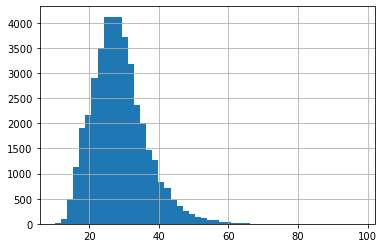

In [125]:
data['bmi'].hist(bins=50)

<AxesSubplot:>

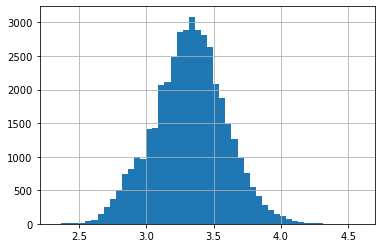

In [126]:
data["bmi"] = np.log(data['bmi']+0.1)
test["bmi"] = np.log(test['bmi']+0.1)

data.bmi.hist(bins = 50)

# 2. Binning

# age

In [127]:
bins=[0,19,30,50,90]
labels =["minor","young","elder","old"]
data['age_category']=pd.cut(data["age"], bins= bins, labels= labels)
test['age_category']=pd.cut(test["age"], bins= bins, labels= labels)

## Data Cleansing

### 1. 1.Missing Values Imputation

In [128]:
## 5.1. Imputing Central tendency values (median & mode) in train and test
### Column : bmi 

# We can see that BMI is Missing Completely at Random
# replace missing values in variable 'bmi' with its Median

data['bmi']=data['bmi'].fillna(data['bmi'].median())
print ("\nMissing values :  ", data.isna().sum().values.sum())
test['bmi']=test['bmi'].fillna(test['bmi'].median())
print ("\nMissing values :  ", test.isna().sum().values.sum())


### Column: Smoking Status

data['smoking_status'] = data['smoking_status'].replace(np.nan, "unknown")
print ("\nMissing values :  ", data.isna().sum().values.sum())
mode_val = test['smoking_status'].mode()[0]
test['smoking_status'] = test['smoking_status'].replace(np.nan, "unknown")
print ("\nMissing values :  ", test.isna().sum().values.sum())




Missing values :   13292

Missing values :   5751

Missing values :   0

Missing values :   0


# Step 6: Feature Engineering

In [129]:
data['glulevel'] = np.where((data["age"] >50) & (data["avg_glucose_level"] >180 ) , 1,0)
test['glulevel'] = np.where((test["age"] >50) & (test["avg_glucose_level"] >180 ) , 1,0)

data['BPheart'] = np.where((data["hypertension"] == 1) & (data["heart_disease"] == 1), 1,0)
test['BPheart'] = np.where((test["hypertension"] == 1) & (test["heart_disease"] == 1), 1,0)

In [130]:
data['badcond'] = np.where(((data["BPheart"] == 1) & (data["glulevel"] == 1)) & (data["smoking_status"].isin([1,2,3])), 1,0)
test['badcond'] = np.where(((test["BPheart"] == 1) & (test["glulevel"] == 1)) & (test["smoking_status"].isin([1,2,3])), 1,0)

In [131]:
joblist= ["Self-employed", "Private"]
data["Oldmarriedself"]= np.where((data["ever_married"] == "Yes") & (data["work_type"].isin(joblist)) & (data["age"] > 49), 1,0)
test["Oldmarriedself"]= np.where((test["ever_married"] == "Yes") & (test["work_type"].isin(joblist)) & (test["age"] > 49), 1,0)

In [132]:
joblist= ["Govt_job"]
data["FemaleGlucGovt"]= np.where((data["gender"] == "Female") & (data["work_type"].isin(joblist)) & (data["avg_glucose_level"] > 170), 1,0)
test["FemaleGlucGovt"]= np.where((test["gender"] == "Female") & (test["work_type"].isin(joblist)) & (test["avg_glucose_level"] > 170), 1,0)

In [133]:
featcol= data[["age_category", "glulevel" ,"BPheart","badcond", "Oldmarriedself","FemaleGlucGovt"]]

In [134]:
data.smoking_status.unique()

array(['unknown', 'never smoked', 'formerly smoked', 'smokes'],
      dtype=object)

# Step 6: Data Transformations

## Preprocessing: Train dataset

### Categorical encoding

Since people who've never smoked are probably less likely (on average) to have a stroke than those who did smoke in the past, which in turn are less likely to have a stroke than those who currently smoke, we can say there is some inherent order to these three categories.
Thus, it would be meaningful to encode them with 0, 1 & 2.



In [135]:
age_category = {'minor':0, 'young':1, 'elder':2 ,'old':3}
data["age_category"] = data["age_category"].map(age_category)

In [136]:
smoking_map={"never smoked":0,"formerly smoked":1,"smokes":2, "unknown":3}
data['smoking_status'] = data['smoking_status'].map(smoking_map)

In [137]:
## Label encode categorical variables

cat_variables = data[["gender", 'ever_married', 'work_type','Residence_type' ]]

# Encoding Train Categorical Features
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
data = data.drop(["gender", 'ever_married', 'work_type','Residence_type'], axis=1)
data = pd.concat([data, cat_dummies], axis=1)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,age_category,glulevel,BPheart,...,Oldmarriedself,FemaleGlucGovt,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
0,3.0,0,0,95.12,2.895912,3,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,58.0,1,0,87.96,3.671225,0,0,3,0,0,...,1,0,1,0,1,0,1,0,0,1
2,8.0,0,0,110.89,2.873565,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,70.0,0,0,69.04,3.583519,1,0,3,0,0,...,1,0,0,0,1,0,1,0,0,0
4,14.0,0,0,161.28,2.954910,3,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


## Preprocessing: Test dataset

In [138]:
age_category = {'minor':0, 'young':1, 'elder':2 ,'old':3}
test["age_category"] =test["age_category"].map(age_category)

In [139]:
smoking_map={"never smoked":0,"formerly smoked":1,"smokes":2, "unknown":3}
test['smoking_status'] = test['smoking_status'].map(smoking_map)

In [140]:
### Label encode categorical variables

cat_variables = test[["gender", 'ever_married', 'work_type','Residence_type' ]]

# Encoding Test Categorical Features
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
test = test.drop(["gender", 'ever_married', 'work_type','Residence_type'], axis=1)
test = pd.concat([test, cat_dummies], axis=1)
test.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,age_category,glulevel,BPheart,badcond,Oldmarriedself,FemaleGlucGovt,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
0,80.0,0,0,83.84,3.054001,1,3,0,0,0,1,0,1,0,1,0,1,0,0,1
1,74.0,0,1,179.50,3.261935,1,3,0,0,0,1,0,0,0,1,0,0,1,0,0
2,14.0,0,0,95.16,3.058707,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,28.0,0,0,94.76,3.157000,3,1,0,0,0,0,0,1,0,0,0,1,0,0,1
4,63.0,0,0,83.57,3.321432,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0


In [141]:
### Lets combine training and test dataset

#Combine train and test datasets
combine_set=pd.concat([data,test], ignore_index=True)
combine_set.shape

(62001, 21)

In [142]:
## Droping gender_Other
combine_set = combine_set.drop(["gender_Other"], axis=1)

# Step 7: Segregate train and test


In [143]:
#Segregate train and test
train_df=combine_set[combine_set['stroke'].isna()==False]
test_df=combine_set[combine_set['stroke'].isna()==True]

#Drop target variable from X and copy to y
X=train_df.drop(['stroke'],axis=1)
y=train_df['stroke']
X.shape, y.shape

#Drop target column (which is blank) from test dataset
X_main_test=test_df.drop(['stroke'],axis=1)

### Feature selection  using SelectKBest and F_Classif.

In [144]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,age_category,glulevel,BPheart,badcond,Oldmarriedself,FemaleGlucGovt,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
0,3.0,0,0,95.12,2.895912,3,0,0,0,0,0,0,1,0,0,0,0,1,0
1,58.0,1,0,87.96,3.671225,0,3,0,0,0,1,0,1,1,0,1,0,0,1
2,8.0,0,0,110.89,2.873565,3,0,0,0,0,0,0,0,0,0,1,0,0,1
3,70.0,0,0,69.04,3.583519,1,3,0,0,0,1,0,0,1,0,1,0,0,0
4,14.0,0,0,161.28,2.954910,3,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,3.020425,0,0,0,0,0,0,0,0,0,0,0,0,1,1
43396,56.0,0,0,213.61,4.016383,1,3,1,0,0,0,1,0,1,0,0,0,0,1
43397,82.0,1,0,91.94,3.367296,1,3,0,0,0,1,0,0,1,0,1,0,0,1
43398,40.0,0,0,99.16,3.505557,0,2,0,0,0,0,0,1,1,0,1,0,0,1


In [145]:

from sklearn.feature_selection import SelectKBest, f_classif

classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(X,y)
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(train_df.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)


,Attribute,Score
0,age,1083.173455
6,age_category,655.079545
10,Oldmarriedself,618.480780
2,heart_disease,569.021453
7,glulevel,455.666761
3,avg_glucose_level,271.972590
1,hypertension,247.686992
13,ever_married_Yes,225.639647
8,BPheart,203.260373
16,work_type_Self-employed,163.131429


In [146]:
cols=fscores[fscores['Score']>50]['Attribute']
print(cols)

0                         age
1                hypertension
2               heart_disease
3           avg_glucose_level
6                age_category
7                    glulevel
8                     BPheart
10             Oldmarriedself
13           ever_married_Yes
16    work_type_Self-employed
17         work_type_children
Name: Attribute, dtype: object


In [147]:
### based on SelectKBest insights
X = X[cols]
X

,age,hypertension,heart_disease,avg_glucose_level,age_category,glulevel,BPheart,Oldmarriedself,ever_married_Yes,work_type_Self-employed,work_type_children
0,3.0,0,0,95.12,0,0,0,0,0,0,1
1,58.0,1,0,87.96,3,0,0,1,1,0,0
2,8.0,0,0,110.89,0,0,0,0,0,0,0
3,70.0,0,0,69.04,3,0,0,1,1,0,0
4,14.0,0,0,161.28,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,0,0,0,0,0,0,1
43396,56.0,0,0,213.61,3,1,0,0,1,0,0
43397,82.0,1,0,91.94,3,0,0,1,1,0,0
43398,40.0,0,0,99.16,2,0,0,0,1,0,0


## Segregate train and Valid-test set


In [148]:
#Splitting the data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=56)

##  step 8. Scaling the data (Using MinMax Scaler)

In [149]:

## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols = X_train.columns

X_train = scaler.fit_transform(X_train) # Training dataset
X_train = pd.DataFrame(X_train, columns=cols)

X_test = scaler.transform(X_test) # validation dataset
X_test = pd.DataFrame(X_test, columns=cols)

In [150]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(34720, 11) (34720,) (8680, 11) (8680,)


#################=================++++++++++++++++++++++++=======================########################################

# Step: 9 Model Building and Evaluation Metrics
Since this is a binary classification problem, AUC-ROC is the evaluation metric

The ROC AUC is the area under the curve when plotting the (normalized) true positive rate (x-axis) and the false positive rate (y-axis).

## Logistic Regression (manual class weights):


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.3min finished


Text(0.5, 1.0, 'Scoring for different class weights')

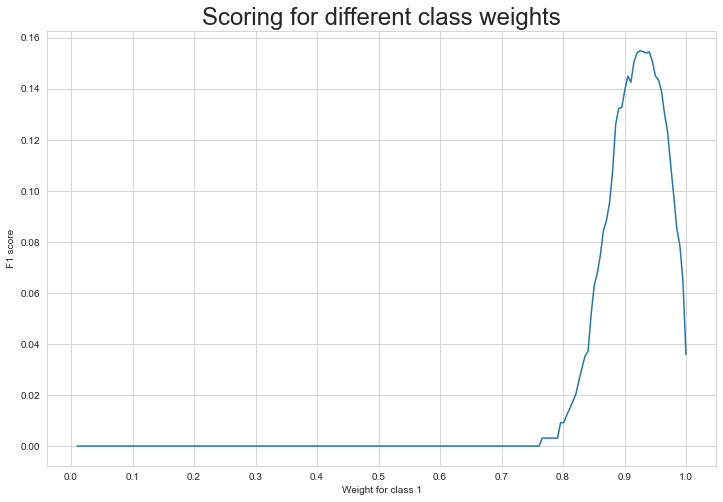

In [151]:

from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

The f1 score for the training data: 0.15864218912365777
The auc_roc score for the training data: 0.6509097604481964
The roc_auc_train score for the training data: 0.8546549125787047
The f1 score for the testing data: 0.1398809523809524
The auc_roc score for the testing data: 0.6298198673766972
The roc_auc_test score for the testing data: 0.8394524824190339


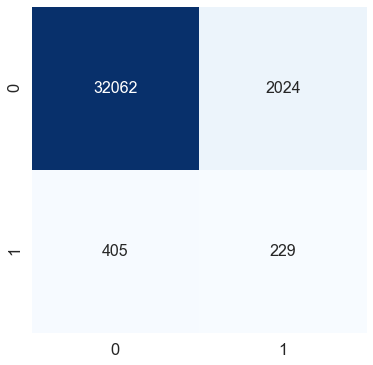

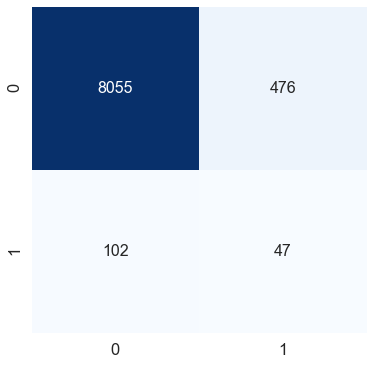

In [152]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.065, 1: 0.935})
lr.fit(X_train, y_train)


### Making predictions using *predict_proba* function
# Predicting over the Train
x_prob = lr.predict_proba(X_train)[:,1] 
pred_train = np.where(x_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

# Predicting on the test data
y_prob = lr.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
pred_test = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.


#Calculating and printing the f1 score 
f1_test = f1_score(y_train, pred_train)
auc_roc= roc_auc_score(y_train,pred_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, x_prob)
roc_auc_train = auc(false_positive_rate, true_positive_rate)

print('The f1 score for the training data:', f1_test)
print('The auc_roc score for the training data:', auc_roc)
print('The roc_auc_train score for the training data:', roc_auc_train)


#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
auc_roc= roc_auc_score(y_test,pred_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc_test = auc(false_positive_rate, true_positive_rate)

print('The f1 score for the testing data:', f1_test)
print('The auc_roc score for the testing data:', auc_roc)
print('The roc_auc_test score for the testing data:', roc_auc_test)


# Function to create a confusion matrix 
def conf_matrix(y_t, pred_t):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_t, pred_t)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Calling function 
conf_matrix(y_train, pred_train)
conf_matrix(y_test, pred_test)


Text(0.5, 0, 'False Positive Rate')

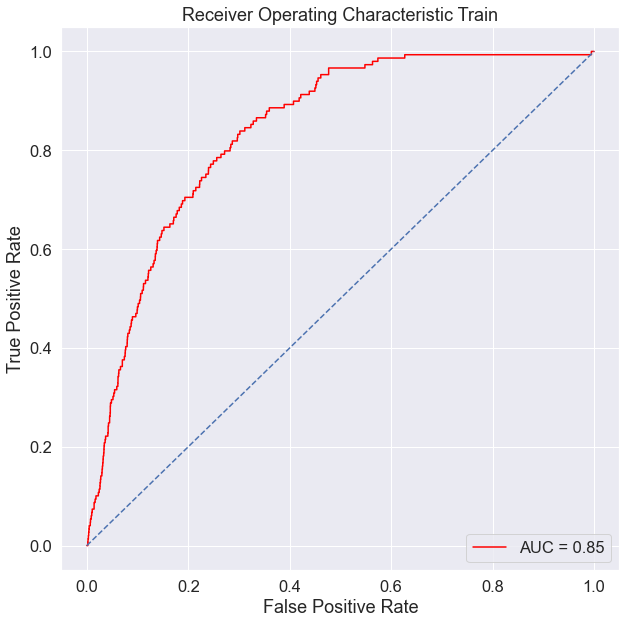

In [153]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic Train')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

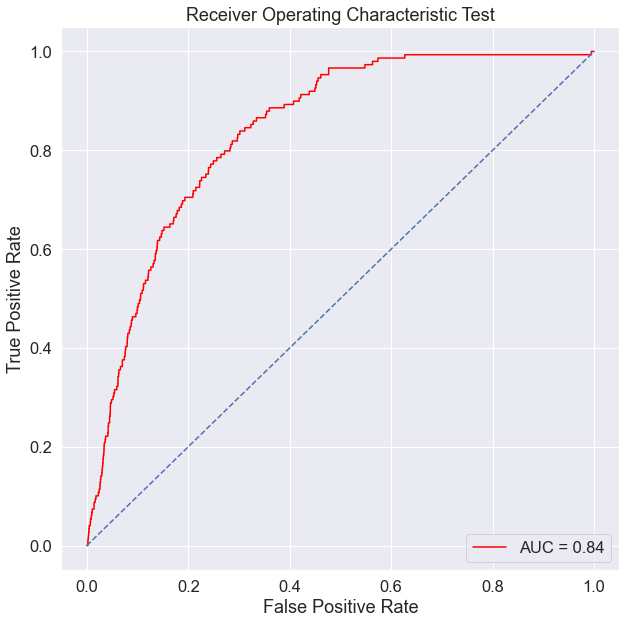

In [154]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic Test')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#################################################################################################

## Step:10 Feature Selection - selecting variables with high coefficient

In [155]:
# Parameters of Logistic Regression

# printing the coefficients
lr.coef_

array([[ 4.56259902,  0.37669555,  0.74247369,  0.81720263,  1.43797631,
         0.05144368, -0.1836765 , -0.03669401,  0.02094682,  0.04301168,
        -0.11543102]])

Text(0.5, 1.0, 'Coefficient plot')

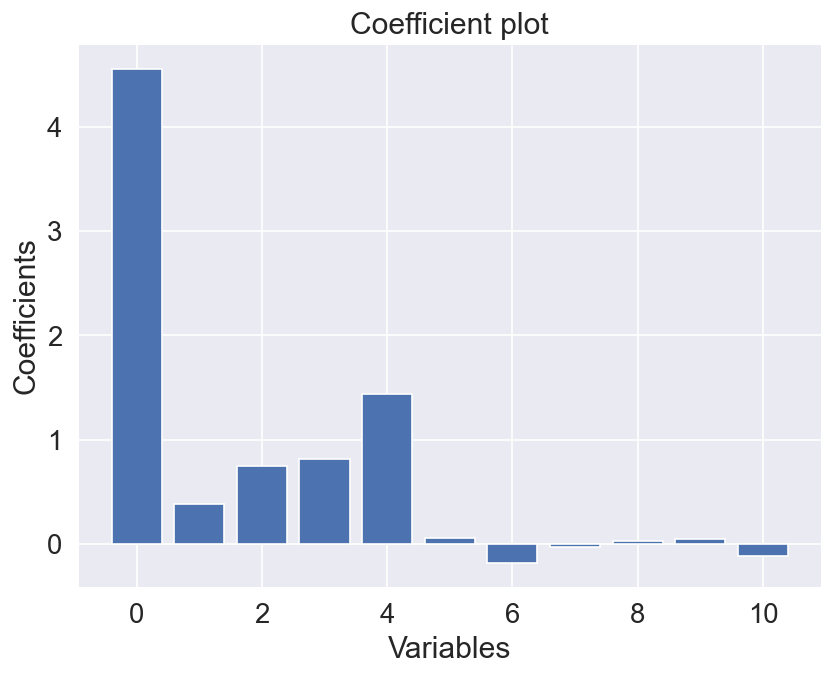

In [156]:
### Plotting the coefficients

plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
c = lr.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [157]:
Coefficients = pd.DataFrame({
    'Variable'    : X_train.columns,
    'coefficient' : abs(c)
})
Coefficients.head()

,Variable,coefficient
0,age,4.562599
1,hypertension,0.376696
2,heart_disease,0.742474
3,avg_glucose_level,0.817203
4,age_category,1.437976


## selecting variables with high coefficient

In [158]:
sig_var = Coefficients[Coefficients.coefficient > 0.3]

subset = data[sig_var['Variable'].values]

In [159]:
# Using train test split function
X_train,X_test,y_train,y_test = train_test_split(subset, y, random_state = 56)

The f1 score for the training data: 0.15772669220945085
The auc_roc score for the training data: 0.6737586433465786
The roc_auc_train score for the training data: 0.8563495971241266
The f1 score for the testing data: 0.13594232749742532
The auc_roc score for the testing data: 0.6367416062970187
The roc_auc_test score for the testing data: 0.836961800718244


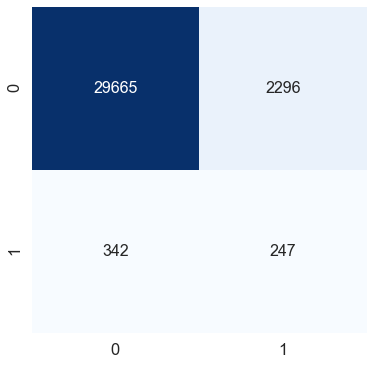

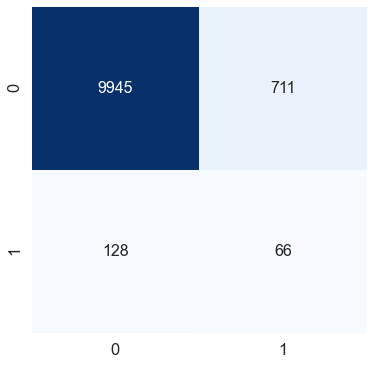

In [160]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lrcoef = LogisticRegression(solver='newton-cg', class_weight={0: 0.065, 1: 0.935})
lrcoef.fit(X_train, y_train)


### Making predictions using *predict_proba* function
# Predicting over the Train
x_prob = lrcoef.predict_proba(X_train)[:,1] 
pred_train = np.where(x_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

# Predicting on the test data
y_prob = lrcoef.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
pred_test = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.


#Calculating and printing the f1 score 
f1_test = f1_score(y_train, pred_train)
auc_roc= roc_auc_score(y_train,pred_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, x_prob)
roc_auc_train = auc(false_positive_rate, true_positive_rate)

print('The f1 score for the training data:', f1_test)
print('The auc_roc score for the training data:', auc_roc)
print('The roc_auc_train score for the training data:', roc_auc_train)


#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
auc_roc= roc_auc_score(y_test,pred_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc_test = auc(false_positive_rate, true_positive_rate)

print('The f1 score for the testing data:', f1_test)
print('The auc_roc score for the testing data:', auc_roc)
print('The roc_auc_test score for the testing data:', roc_auc_test)


# Function to create a confusion matrix 
def conf_matrix(y_t, pred_t):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_t, pred_t)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Calling function 
conf_matrix(y_train, pred_train)
conf_matrix(y_test, pred_test)


Text(0.5, 0, 'False Positive Rate')

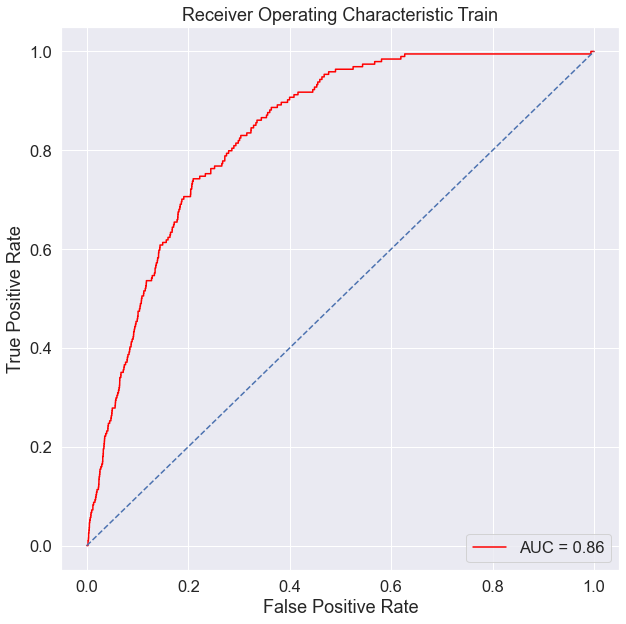

In [161]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic Train')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

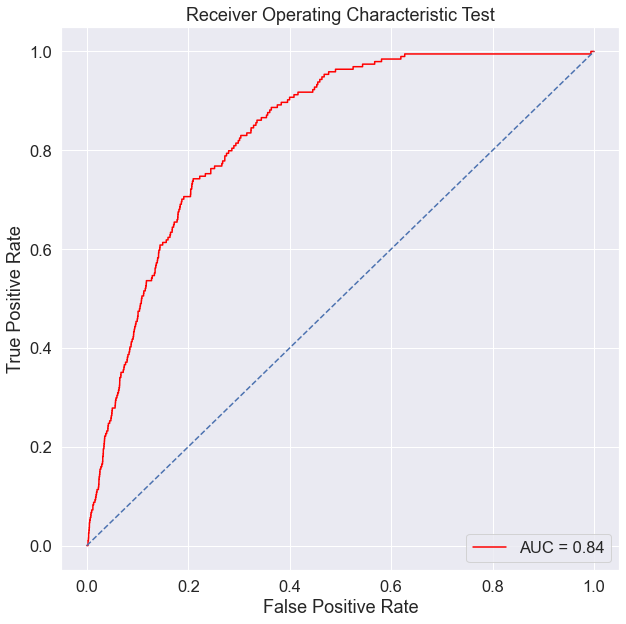

In [162]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic Test')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## feature selection with lasso & ridge regularization

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR = LogisticRegression(solver='newton-cg', class_weight='balanced')

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

In [164]:
from sklearn.model_selection import GridSearchCV
lr= GridSearchCV(LR, tuned_parameters,cv=10)

In [165]:
lr.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='newton-cg',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [166]:
print(lr.best_params_)

{'C': 0.001, 'penalty': 'l2'}


In [167]:
lr= LogisticRegression(solver='newton-cg', class_weight='balanced', penalty='l2', C=0.001)
lr.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
a=list(X_train)

The f1 score for the training data: 0.09984591679506934
The auc_roc score for the training data: 0.777086053891338
The roc_auc_train score for the training data: 0.8539785516399471
The f1 score for the testing data: 0.09526813880126182
The auc_roc score for the testing data: 0.7566208283025293
The roc_auc_test score for the testing data: 0.833497801925637


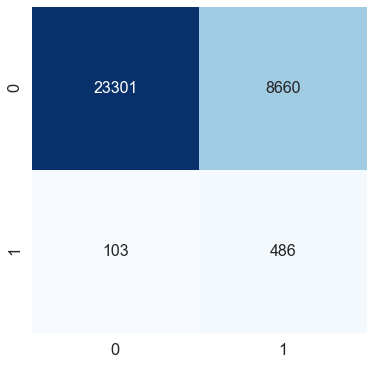

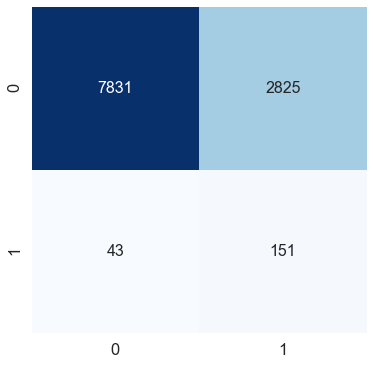

In [169]:

### Making predictions using *predict_proba* function
# Predicting over the Train
x_prob = lr.predict_proba(X_train)[:,1] 
pred_train = np.where(x_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

# Predicting on the test data
y_prob = lr.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
pred_test = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.


#Calculating and printing the f1 score 
f1_test = f1_score(y_train, pred_train)
auc_roc= roc_auc_score(y_train,pred_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, x_prob)
roc_auc_train = auc(false_positive_rate, true_positive_rate)

print('The f1 score for the training data:', f1_test)
print('The auc_roc score for the training data:', auc_roc)
print('The roc_auc_train score for the training data:', roc_auc_train)


#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
auc_roc= roc_auc_score(y_test,pred_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc_test = auc(false_positive_rate, true_positive_rate)

print('The f1 score for the testing data:', f1_test)
print('The auc_roc score for the testing data:', auc_roc)
print('The roc_auc_test score for the testing data:', roc_auc_test)


# Function to create a confusion matrix 
def conf_matrix(y_t, pred_t):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_t, pred_t)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Calling function 
conf_matrix(y_train, pred_train)
conf_matrix(y_test, pred_test)



Text(0.5, 0, 'False Positive Rate')

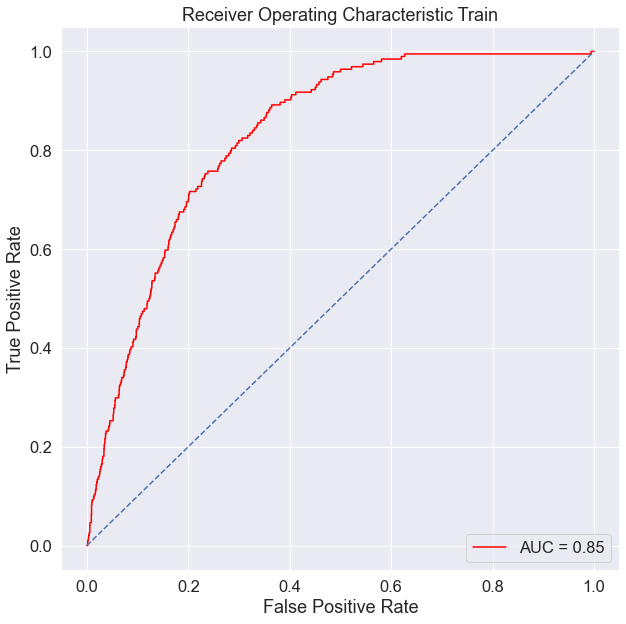

In [170]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic Train')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


Text(0.5, 0, 'False Positive Rate')

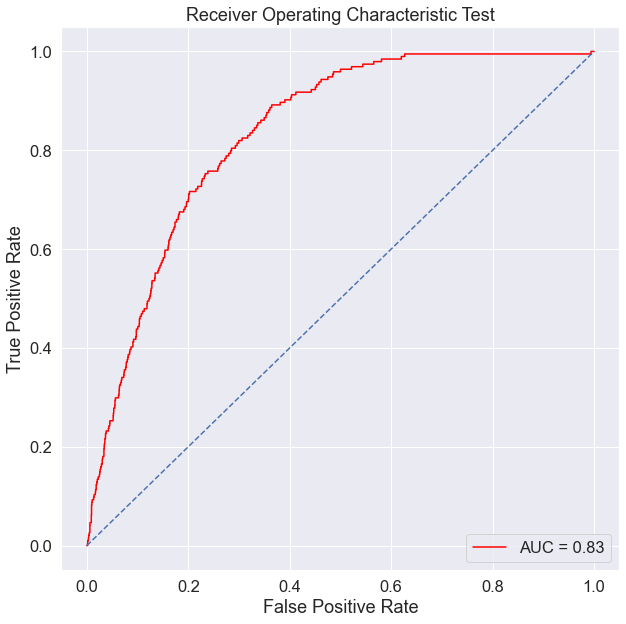

In [171]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic Test')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Cross validation

Cross-validation scores:[0.83193443 0.77984596 0.82502222 0.81593759 0.8982917  0.84738817
 0.85892019 0.84910798 0.86075117 0.78657277]
min : 0.7798459563543003 max 0.8982916954675619
Mean CV score is:  0.835


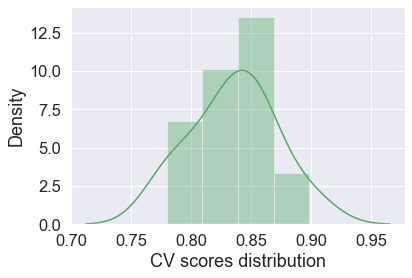

In [172]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lrcoef, X_test, y_test, cv = 10, scoring='roc_auc')
print('Cross-validation scores:{}'.format(scores))
print("min :" ,scores.min(),"max", scores.max())
print('Mean CV score is: ', round(np.mean(scores),3))
pltt = sns.distplot(pd.Series(scores,name='CV scores distribution'), color='g')

Cross-validation scores:[0.19354839 0.11627907 0.12048193 0.08955224 0.14736842 0.08695652
 0.18823529 0.12765957 0.12345679 0.08695652]
min : 0.08695652173913043 max 0.1935483870967742
Mean CV score is:  0.128


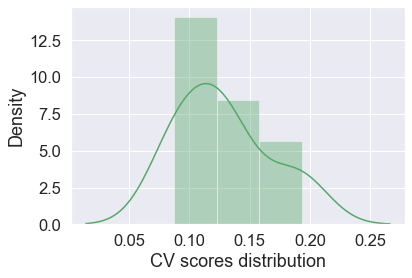

In [173]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lrcoef, X_test, y_test, cv = 10, scoring='f1')
print('Cross-validation scores:{}'.format(scores))
print("min :" ,scores.min(),"max", scores.max())
print('Mean CV score is: ', round(np.mean(scores),3))
pltt = sns.distplot(pd.Series(scores,name='CV scores distribution'), color='g')

# Step 8: Prepare submission file with final prediction

In [174]:
X_main_test_sub= X_main_test[a]

+++++++++++++++++++++++++++++++++++++++++++++++++++

In [175]:
#Predict on actual test dataset for final prediction
predicted_test = lr.predict_proba(X_main_test_sub)[:,1] 
predicted_test

array([0.81690026, 0.84961318, 0.02342559, ..., 0.83378978, 0.38721496,
       0.14925392])

In [176]:
my_submission = pd.DataFrame({'id': submission['id'], 'stroke': predicted_test})

In [177]:
my_submission.to_csv(r'D:\Datascience\Analytics vidya\LabAV\ML hackathon Assesment\submissions\ Logistic Regression (manual weights) -feat engg-  age -selectkbest- high coeff - regularised.csv', index=False)